In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from scipy import stats 

In [2]:
dt=pd.read_excel('brazilian_ecommerce.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
dt.head()

customer_city                       customer_id customer_state  \
0                botucatu  f581d009238201744f193e9fce843a3b             SP   
1  santo antonio de posse  22de66d61152dcce3ff193b0734a2a7f             SP   
2   sao bernardo do campo  6cf048ee948a79b9d946243e1e05fcf1             SP   
3                cacapava  c8ed2b9476c21e4cfffa0dc1cff1d3a9             SP   
4               sao paulo  114160a5c0479d82ba49213e40a690c7             SP   

                 customer_unique_id  customer_zip_code_prefix  freight_value  \
0  b17edf8c0f122279a1160720468ebc69                     18605          12.83   
1  bc897a7580447cd7bb7416411d0b6442                     13830           7.65   
2  e5d4f3b301959c88077a062efbe3ebf9                      9781           7.65   
3  331b3b4cbbec4a67b2d5544a3ee694b6                     12285          12.93   
4  8d86e2d560f5ddbbd6354523017a492d                      3819          16.32   

    order_approved_at order_delivered_carrier_date  \
0 2018-06-01 15:52:45          2018-06-04 09:14:00   
1 2018-07-24 11:32:51          2018-07-25 16:42:00   
2 2018-08-15 03:23:59          2018-08-15 12:59:00   
3 2018-08-11 02:35:26          2018-08-13 15:43:00   
4 2018-04-06 03:28:22          2018-04-07 00:26:34   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-06-11 19:07:24                    2018-07-04   
1           2018-07-26 21:55:50                    2018-08-01   
2           2018-08-16 11:15:42                    2018-08-17   
3           2018-08-20 23:45:36                    2018-08-16   
4           2018-04-09 14:32:33                    2018-04-30   

                           order_id  order_item_id order_purchase_timestamp  \
0  162fcce5f7c895e5afb504f6f1cee4ed              1      2018-06-01 07:11:05   
1  e6e33920ebe2e3442b4c9cf86d4721aa              1      2018-07-21 16:01:11   
2  270044e25a104d6ab5daf7369e33779d              1      2018-08-14 07:23:07   
3  accddd3ce343b9c4a7ad6d49ecc3c3d2              1      2018-08-09 18:31:58   
4  eb659e24ed654c43d1e9b8b13ba04f5f              1      2018-04-05 08:02:41   

  order_status  payment_installments  payment_sequential payment_type  \
0    delivered                     1                   1       boleto   
1    delivered                     1                   1       boleto   
2    delivered                     1                   1       boleto   
3    delivered                     1                   1       boleto   
4    delivered                     1                   1       boleto   

   payment_value  price  product_category_name  product_description_lenght  \
0          67.83  55.00     relogios_presentes                       335.0   
1          62.65  55.00     relogios_presentes                       335.0   
2          62.65  55.00     relogios_presentes                       335.0   
3          51.88  38.95              telefonia                       713.0   
4          41.32  25.00  utilidades_domesticas                       945.0   

   product_height_cm                        product_id  product_length_cm  \
0                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
1                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
2                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
3               10.0  abc3432ff825d8e524db1d4eac6d2099               17.0   
4               18.0  149e60a7a51b85a834c055f8025ae3e5               16.0   

   product_name_lenght  product_photos_qty  product_weight_g  \
0                 54.0                 4.0             250.0   
1                 54.0                 4.0             250.0   
2                 54.0                 4.0             250.0   
3                 54.0                 4.0             150.0   
4                 54.0                 4.0             600.0   

   product_width_cm                         seller_id shipping_limit_date  
0              11.0  6560211a19b47992c3

In [5]:
dt.shape

(117601, 30)

In [6]:
dt.dtypes

customer_city                            object
customer_id                              object
customer_state                           object
customer_unique_id                       object
customer_zip_code_prefix                  int64
freight_value                           float64
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_id                                 object
order_item_id                             int64
order_purchase_timestamp         datetime64[ns]
order_status                             object
payment_installments                      int64
payment_sequential                        int64
payment_type                             object
payment_value                           float64
price                                   float64
product_category_name                    object
product_description_lenght              

In [7]:
dt.isnull().sum()

customer_city                       0
customer_id                         0
customer_state                      0
customer_unique_id                  0
customer_zip_code_prefix            0
freight_value                       0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_id                            0
order_item_id                       0
order_purchase_timestamp            0
order_status                        0
payment_installments                0
payment_sequential                  0
payment_type                        0
payment_value                       0
price                               0
product_category_name            1698
product_description_lenght       1698
product_height_cm                  20
product_id                          0
product_length_cm                  20
product_name_lenght              1698
product_photos_qty               1698
product_weig

### BOXPLOTS - CHECKING FOR OUTLIERS

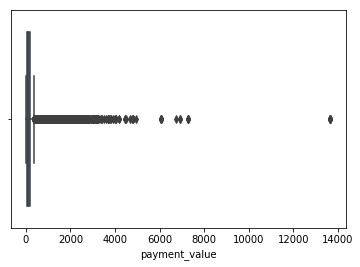

In [8]:
sns.boxplot(x='payment_value',data=dt)

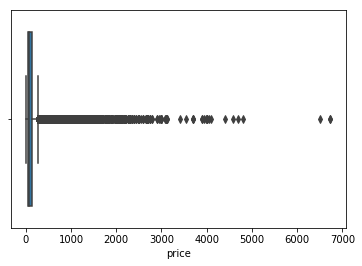

In [9]:
sns.boxplot(x='price',data=dt)

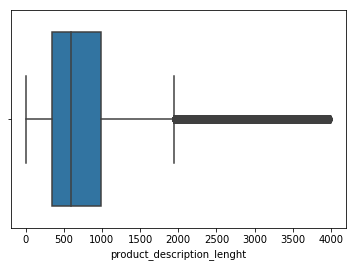

In [10]:
sns.boxplot(x='product_description_lenght',data=dt)

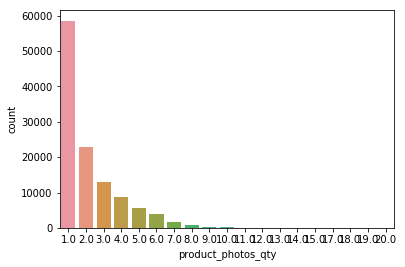

In [11]:
sns.countplot(dt['product_photos_qty'])

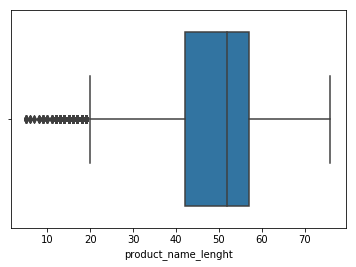

In [12]:
sns.boxplot(x='product_name_lenght',data=dt)

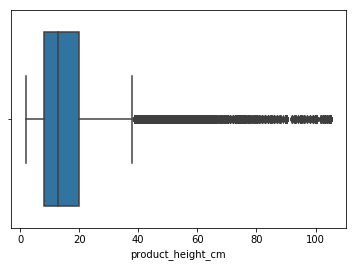

In [13]:
sns.boxplot(x='product_height_cm',data=dt)

In [14]:
dt['product_height_cm'].max()

105.0

In [15]:
dt['product_height_cm'].min()

2.0

In [16]:
dt['product_name_lenght'].min()

5.0

In [17]:
dt['product_name_lenght'].max()

76.0

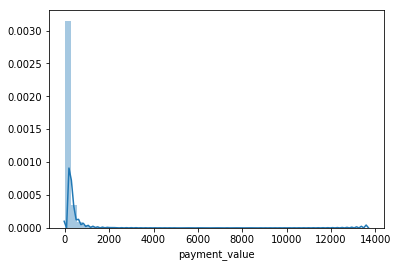

In [18]:
sns.distplot(dt['payment_value'])
#plt.savefig("Dist plot for payment value.png")

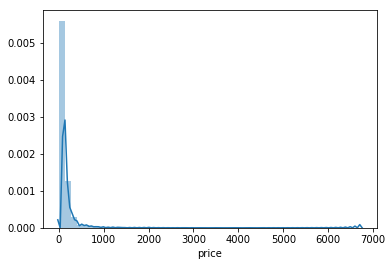

In [19]:
sns.distplot(dt['price'])
#plt.savefig("Dist plot for price.png")

## Handling outliers - IQR

In [20]:
dt['product_description_lenght'].describe()

count    115903.000000
mean        786.950855
std         653.036231
min           4.000000
25%         347.000000
50%         601.000000
75%         985.000000
max        3992.000000
Name: product_description_lenght, dtype: float64

In [21]:
## Outlier calculation , Q3+1.5IQR and Q1 + 1.5IQR 
Upper_limit = 985 + 3 * (985-347)
Lower_limit = 347 - 3 * (985-347)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 2899
Lower_limit : -1567


In [22]:
df1 = dt[dt['product_description_lenght']>2899]
print(df1.shape)
df2 = dt[dt['product_description_lenght']<-1567]
df2.shape

(2408, 30)


(0, 30)

In [23]:
dt['product_name_lenght'].describe()

count    115903.000000
mean         48.767590
std          10.035011
min           5.000000
25%          42.000000
50%          52.000000
75%          57.000000
max          76.000000
Name: product_name_lenght, dtype: float64

In [24]:
Upper_limit = 57 + 3 * (57-42)
Lower_limit = 42 - 3 * (57-42)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 102
Lower_limit : -3


In [25]:
df1 = dt[dt['product_name_lenght']>102]
print(df1.shape)
df2 = dt[dt['product_name_lenght']<-3]
df2.shape

(0, 30)


(0, 30)

In [26]:
dt.head(2)

customer_city                       customer_id customer_state  \
0                botucatu  f581d009238201744f193e9fce843a3b             SP   
1  santo antonio de posse  22de66d61152dcce3ff193b0734a2a7f             SP   

                 customer_unique_id  customer_zip_code_prefix  freight_value  \
0  b17edf8c0f122279a1160720468ebc69                     18605          12.83   
1  bc897a7580447cd7bb7416411d0b6442                     13830           7.65   

    order_approved_at order_delivered_carrier_date  \
0 2018-06-01 15:52:45          2018-06-04 09:14:00   
1 2018-07-24 11:32:51          2018-07-25 16:42:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-06-11 19:07:24                    2018-07-04   
1           2018-07-26 21:55:50                    2018-08-01   

                           order_id  order_item_id order_purchase_timestamp  \
0  162fcce5f7c895e5afb504f6f1cee4ed              1      2018-06-01 07:11:05   
1  e6e33920ebe2e3442b4c9cf86d4721aa              1      2018-07-21 16:01:11   

  order_status  payment_installments  payment_sequential payment_type  \
0    delivered                     1                   1       boleto   
1    delivered                     1                   1       boleto   

   payment_value  price product_category_name  product_description_lenght  \
0          67.83   55.0    relogios_presentes                       335.0   
1          62.65   55.0    relogios_presentes                       335.0   

   product_height_cm                        product_id  product_length_cm  \
0                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
1                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   

   product_name_lenght  product_photos_qty  product_weight_g  \
0                 54.0                 4.0             250.0   
1                 54.0                 4.0             250.0   

   product_width_cm                         seller_id shipping_limit_date  
0              11.0  6560211a19b47992c3666cc44a7e94c0 2018-06-11 15:52:45  
1              11.0  6560211a19b47992c3666cc44a7e94c0 2018-07-26 03:55:15

In [27]:
dt['product_photos_qty'].value_counts()

1.0     58539
2.0     22896
3.0     12920
4.0      8830
5.0      5585
6.0      3935
7.0      1556
8.0       772
10.0      353
9.0       318
11.0       73
12.0       60
13.0       30
15.0       12
17.0       11
14.0        6
18.0        4
19.0        2
20.0        1
Name: product_photos_qty, dtype: int64

In [28]:
dt['product_category_name'] = dt['product_category_name'].fillna('Unknown')

In [29]:
dt['product_photos_qty'] = dt['product_photos_qty'].fillna(1)

In [30]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
customer_city                    117601 non-null object
customer_id                      117601 non-null object
customer_state                   117601 non-null object
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
freight_value                    117601 non-null float64
order_approved_at                117586 non-null datetime64[ns]
order_delivered_carrier_date     116356 non-null datetime64[ns]
order_delivered_customer_date    115034 non-null datetime64[ns]
order_estimated_delivery_date    117601 non-null datetime64[ns]
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
order_purchase_timestamp         117601 non-null datetime64[ns]
order_status                     117601 non-null object
payment_installments             117601 non-null int64
payment_seq

In [31]:
dt.isnull().sum()

customer_city                       0
customer_id                         0
customer_state                      0
customer_unique_id                  0
customer_zip_code_prefix            0
freight_value                       0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_id                            0
order_item_id                       0
order_purchase_timestamp            0
order_status                        0
payment_installments                0
payment_sequential                  0
payment_type                        0
payment_value                       0
price                               0
product_category_name               0
product_description_lenght       1698
product_height_cm                  20
product_id                          0
product_length_cm                  20
product_name_lenght              1698
product_photos_qty                  0
product_weig

48.76759014003089

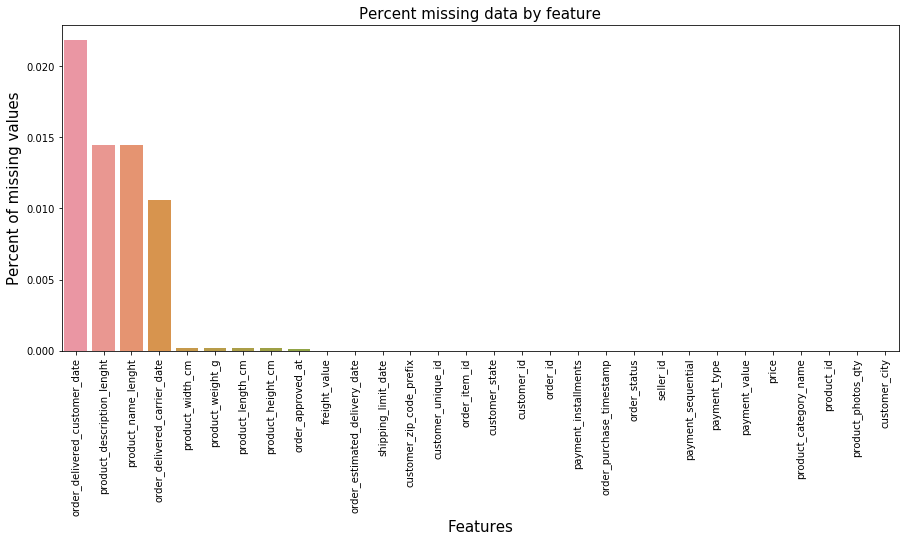

In [32]:
total = dt.isnull().sum().sort_values(ascending=False)
percent = (dt.isnull().sum()/dt.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()
#plt.savefig("Missing Data Garph 1.png")

dt['product_name_lenght'].mean()

In [33]:
dt['product_name_lenght'] = dt['product_name_lenght'].fillna(48)

In [34]:
dt['product_name_lenght'].median()

51.0

In [35]:
dt['product_name_lenght'] = dt['product_name_lenght'].fillna(52)

In [36]:
dt['product_width_cm'].describe()

count    117581.000000
mean         23.068574
std          11.748468
min           6.000000
25%          15.000000
50%          20.000000
75%          30.000000
max         118.000000
Name: product_width_cm, dtype: float64

In [37]:
Upper_limit = 30 + 3* (30-15)
Lower_limit = 15 - 3 * (30-15)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 75
Lower_limit : -30


In [38]:
df1 = dt[dt['product_width_cm']>75]
print(df1.shape)
df2 = dt[dt['product_width_cm']<-30]
df2.shape

(434, 30)


(0, 30)

In [39]:
dt['product_width_cm'].median()

20.0

In [40]:
dt['product_width_cm'] = dt['product_width_cm'].fillna(20)

In [41]:
dt['product_weight_g'].describe()

count    117581.000000
mean       2114.309497
std        3788.798201
min           0.000000
25%         300.000000
50%         700.000000
75%        1800.000000
max       40425.000000
Name: product_weight_g, dtype: float64

In [42]:
Upper_limit = 1800 + 3* (1800-300)
Lower_limit = 300 - 3 * (1800-300)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 6300
Lower_limit : -4200


In [43]:
df1 = dt[dt['product_weight_g']>6300]
print(df1.shape)
df2 = dt[dt['product_weight_g']<-4200]
df2.shape

(11681, 30)


(0, 30)

In [44]:
dt['product_weight_g'].median()

700.0

In [45]:
dt['product_weight_g'] = dt['product_weight_g'].fillna(700)

Total   Percent
order_delivered_customer_date   2567  0.021828
product_description_lenght      1698  0.014439
order_delivered_carrier_date    1245  0.010587
product_length_cm                 20  0.000170
product_height_cm                 20  0.000170

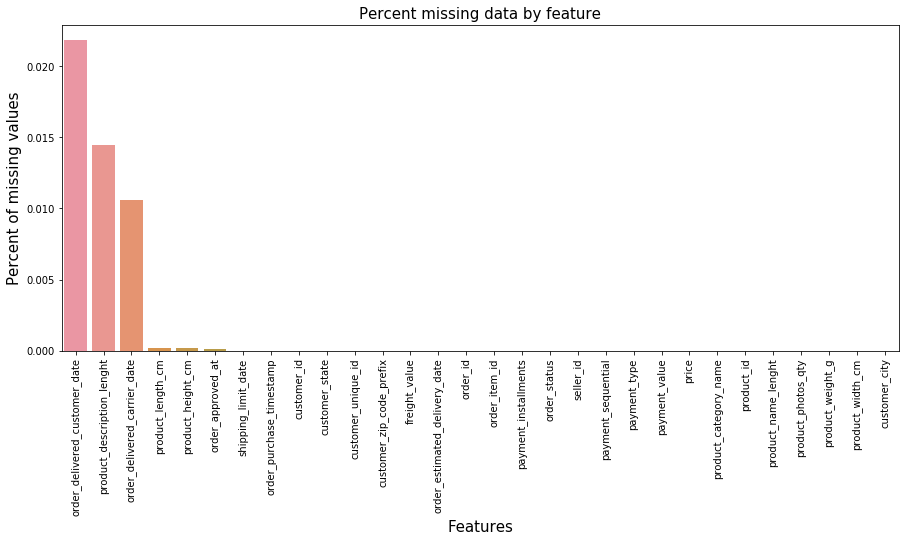

In [46]:
total = dt.isnull().sum().sort_values(ascending=False)
percent = (dt.isnull().sum()/dt.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()
#plt.savefig("Missing Data Garph 2.png")

In [47]:
dt['product_length_cm'].mean()

30.257235437698267

In [48]:
dt['product_length_cm'] = dt['product_length_cm'].fillna(30)

In [49]:
dt['product_height_cm'].mean()

16.63030591677227

In [50]:
dt['product_height_cm'] = dt['product_height_cm'].fillna(17)

In [51]:
dt.isnull().sum()

customer_city                       0
customer_id                         0
customer_state                      0
customer_unique_id                  0
customer_zip_code_prefix            0
freight_value                       0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_id                            0
order_item_id                       0
order_purchase_timestamp            0
order_status                        0
payment_installments                0
payment_sequential                  0
payment_type                        0
payment_value                       0
price                               0
product_category_name               0
product_description_lenght       1698
product_height_cm                   0
product_id                          0
product_length_cm                   0
product_name_lenght                 0
product_photos_qty                  0
product_weig

In [52]:
dt['product_description_lenght'].describe()

count    115903.000000
mean        786.950855
std         653.036231
min           4.000000
25%         347.000000
50%         601.000000
75%         985.000000
max        3992.000000
Name: product_description_lenght, dtype: float64

In [53]:
Upper_limit = 985 + 3* (985-347)
Lower_limit = 347 - 3 * (985-347)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 2899
Lower_limit : -1567


In [54]:
df1 = dt[dt['product_description_lenght']>2899]
print(df1.shape)
df2 = dt[dt['product_description_lenght']<-1567]
df2.shape

(2408, 30)


(0, 30)

In [55]:
dt['product_description_lenght'].mean()

786.9508554567182

In [56]:
dt['product_description_lenght'] = dt['product_description_lenght'].fillna(787)

In [57]:
dt.isnull().sum()

customer_city                       0
customer_id                         0
customer_state                      0
customer_unique_id                  0
customer_zip_code_prefix            0
freight_value                       0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_id                            0
order_item_id                       0
order_purchase_timestamp            0
order_status                        0
payment_installments                0
payment_sequential                  0
payment_type                        0
payment_value                       0
price                               0
product_category_name               0
product_description_lenght          0
product_height_cm                   0
product_id                          0
product_length_cm                   0
product_name_lenght                 0
product_photos_qty                  0
product_weig

In [58]:
dt['order_approved_at'] = dt['order_approved_at'].fillna(value=None, method='backfill', axis=None, limit=None, downcast=None)

In [59]:
dt['order_delivered_carrier_date'] = dt['order_delivered_carrier_date'].fillna(value=None, method='backfill', axis=None, limit=None, downcast=None)

In [60]:
dt['order_delivered_customer_date'] = dt['order_delivered_customer_date'].fillna(value=None, method='backfill', axis=None, limit=None, downcast=None)

In [61]:
dt.isnull().sum()

customer_city                    0
customer_id                      0
customer_state                   0
customer_unique_id               0
customer_zip_code_prefix         0
freight_value                    0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_id                         0
order_item_id                    0
order_purchase_timestamp         0
order_status                     0
payment_installments             0
payment_sequential               0
payment_type                     0
payment_value                    0
price                            0
product_category_name            0
product_description_lenght       0
product_height_cm                0
product_id                       0
product_length_cm                0
product_name_lenght              0
product_photos_qty               0
product_weight_g                 0
product_width_cm                 0
seller_id           

Total  Percent
shipping_limit_date      0      0.0
seller_id                0      0.0
customer_id              0      0.0
customer_state           0      0.0
customer_unique_id       0      0.0

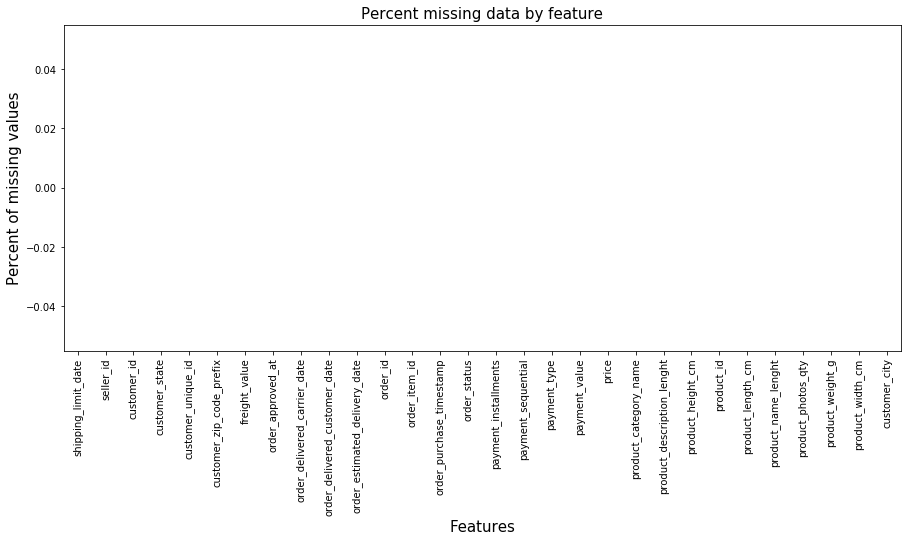

In [62]:
total = dt.isnull().sum().sort_values(ascending=False)
percent = (dt.isnull().sum()/dt.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()
#plt.savefig("Missing Data Garph after Treatment.png")

customer_city                            object
customer_id                              object

customer_unique_id                       object

order_id
payment_type
product_category_name                    object
product_id
seller_id

In [63]:
dt['order_status'].value_counts()

delivered      115035
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: order_status, dtype: int64

In [64]:
dt['payment_type'].value_counts()

credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: payment_type, dtype: int64

In [65]:
len(dt['customer_state'].value_counts())

27

In [66]:
cpy=dt.copy(deep=True)
cpy.head()

customer_city                       customer_id customer_state  \
0                botucatu  f581d009238201744f193e9fce843a3b             SP   
1  santo antonio de posse  22de66d61152dcce3ff193b0734a2a7f             SP   
2   sao bernardo do campo  6cf048ee948a79b9d946243e1e05fcf1             SP   
3                cacapava  c8ed2b9476c21e4cfffa0dc1cff1d3a9             SP   
4               sao paulo  114160a5c0479d82ba49213e40a690c7             SP   

                 customer_unique_id  customer_zip_code_prefix  freight_value  \
0  b17edf8c0f122279a1160720468ebc69                     18605          12.83   
1  bc897a7580447cd7bb7416411d0b6442                     13830           7.65   
2  e5d4f3b301959c88077a062efbe3ebf9                      9781           7.65   
3  331b3b4cbbec4a67b2d5544a3ee694b6                     12285          12.93   
4  8d86e2d560f5ddbbd6354523017a492d                      3819          16.32   

    order_approved_at order_delivered_carrier_date  \
0 2018-06-01 15:52:45          2018-06-04 09:14:00   
1 2018-07-24 11:32:51          2018-07-25 16:42:00   
2 2018-08-15 03:23:59          2018-08-15 12:59:00   
3 2018-08-11 02:35:26          2018-08-13 15:43:00   
4 2018-04-06 03:28:22          2018-04-07 00:26:34   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-06-11 19:07:24                    2018-07-04   
1           2018-07-26 21:55:50                    2018-08-01   
2           2018-08-16 11:15:42                    2018-08-17   
3           2018-08-20 23:45:36                    2018-08-16   
4           2018-04-09 14:32:33                    2018-04-30   

                           order_id  order_item_id order_purchase_timestamp  \
0  162fcce5f7c895e5afb504f6f1cee4ed              1      2018-06-01 07:11:05   
1  e6e33920ebe2e3442b4c9cf86d4721aa              1      2018-07-21 16:01:11   
2  270044e25a104d6ab5daf7369e33779d              1      2018-08-14 07:23:07   
3  accddd3ce343b9c4a7ad6d49ecc3c3d2              1      2018-08-09 18:31:58   
4  eb659e24ed654c43d1e9b8b13ba04f5f              1      2018-04-05 08:02:41   

  order_status  payment_installments  payment_sequential payment_type  \
0    delivered                     1                   1       boleto   
1    delivered                     1                   1       boleto   
2    delivered                     1                   1       boleto   
3    delivered                     1                   1       boleto   
4    delivered                     1                   1       boleto   

   payment_value  price  product_category_name  product_description_lenght  \
0          67.83  55.00     relogios_presentes                       335.0   
1          62.65  55.00     relogios_presentes                       335.0   
2          62.65  55.00     relogios_presentes                       335.0   
3          51.88  38.95              telefonia                       713.0   
4          41.32  25.00  utilidades_domesticas                       945.0   

   product_height_cm                        product_id  product_length_cm  \
0                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
1                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
2                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
3               10.0  abc3432ff825d8e524db1d4eac6d2099               17.0   
4               18.0  149e60a7a51b85a834c055f8025ae3e5               16.0   

   product_name_lenght  product_photos_qty  product_weight_g  \
0                 54.0                 4.0             250.0   
1                 54.0                 4.0             250.0   
2                 54.0                 4.0             250.0   
3                 54.0                 4.0             150.0   
4                 54.0                 4.0             600.0   

   product_width_cm                         seller_id shipping_limit_date  
0              11.0  6560211a19b47992c3

In [67]:
d=pd.DataFrame(dt.dtypes)
d['missingvalue']=dt.isnull().sum()
d['unique']=dt.nunique()
d['count']=dt.count()
d=d.rename(columns={0:'DataType'})
d

DataType  missingvalue  unique   count
customer_city                          object             0    4110  117601
customer_id                            object             0   98665  117601
customer_state                         object             0      27  117601
customer_unique_id                     object             0   95419  117601
customer_zip_code_prefix                int64             0   14976  117601
freight_value                         float64             0    6999  117601
order_approved_at              datetime64[ns]             0   90173  117601
order_delivered_carrier_date   datetime64[ns]             0   81016  117601
order_delivered_customer_date  datetime64[ns]             0   95663  117601
order_estimated_delivery_date  datetime64[ns]             0     449  117601
order_id                               object             0   98665  117601
order_item_id                           int64             0      21  117601
order_purchase_timestamp       datetime64[ns]             0   98111  117601
order_status                           object             0       7  117601
payment_installments                    int64             0      24  117601
payment_sequential                      int64             0      29  117601
payment_type                           object             0       4  117601
payment_value                         float64             0   28938  117601
price                                 float64             0    5968  117601
product_category_name                  object             0      74  117601
product_description_lenght            float64             0    2960  117601
product_height_cm                     float64             0     102  117601
product_id                             object             0   32951  117601
product_length_cm                     float64             0      99  117601
product_name_lenght                   float64             0      66  117601
product_photos_qty                    float64             0      19  117601
product_weight_g                      float64             0    2204  117601
product_width_cm                      float64             0      95  117601
seller_id                              object             0    3095  117601
shipping_limit_date            datetime64[ns]             0   93317  117601

In [68]:
id_cols = ['order_id', 'seller_id', 'customer_id', 'order_item_id', 'product_id', 
           'review_id', 'customer_unique_id', 'seller_zip_code_prefix']
#categorical columns
cat_cols = [x for x in d[d['DataType'] == 'object' ]['DataType'].keys().tolist() if x not in id_cols]
# cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in dt.columns if x not in cat_cols + id_cols]

#Binary columns with 2 values
bin_cols = dt.nunique()[dt.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [69]:
cat_cols

['customer_city',
 'customer_state',
 'order_status',
 'payment_type',
 'product_category_name']

In [70]:
for cols in cat_cols:
    dt[cols]=dt[cols].astype('category')

In [71]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
customer_city                    117601 non-null category
customer_id                      117601 non-null object
customer_state                   117601 non-null category
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
freight_value                    117601 non-null float64
order_approved_at                117601 non-null datetime64[ns]
order_delivered_carrier_date     117601 non-null datetime64[ns]
order_delivered_customer_date    117601 non-null datetime64[ns]
order_estimated_delivery_date    117601 non-null datetime64[ns]
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
order_purchase_timestamp         117601 non-null datetime64[ns]
order_status                     117601 non-null category
payment_installments             117601 non-null int64
payme

In [72]:
dt.shape

(117601, 30)

### Encoding Techniques

In [73]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 

dt['customer_state']= label_encoder.fit_transform(dt['customer_state']) 

In [74]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 

dt['product_category_name']= label_encoder.fit_transform(dt['product_category_name']) 

In [75]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 

dt['customer_city']= label_encoder.fit_transform(dt['customer_city']) 

In [76]:
df_enc = pd.get_dummies(dt,columns=['payment_type','order_status'],drop_first=True)

In [77]:
dt.shape

(117601, 30)

In [78]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 37 columns):
customer_city                    117601 non-null int32
customer_id                      117601 non-null object
customer_state                   117601 non-null int32
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
freight_value                    117601 non-null float64
order_approved_at                117601 non-null datetime64[ns]
order_delivered_carrier_date     117601 non-null datetime64[ns]
order_delivered_customer_date    117601 non-null datetime64[ns]
order_estimated_delivery_date    117601 non-null datetime64[ns]
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
order_purchase_timestamp         117601 non-null datetime64[ns]
payment_installments             117601 non-null int64
payment_sequential               117601 non-null int64
payment_value 

In [79]:
df_enc['product_category_name'] = df_enc['product_category_name'].astype('category')
df_enc['product_category_name'].dtypes

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                  30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                  45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
                  60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73],
                 ordered=False)

In [80]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 37 columns):
customer_city                    117601 non-null int32
customer_id                      117601 non-null object
customer_state                   117601 non-null int32
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
freight_value                    117601 non-null float64
order_approved_at                117601 non-null datetime64[ns]
order_delivered_carrier_date     117601 non-null datetime64[ns]
order_delivered_customer_date    117601 non-null datetime64[ns]
order_estimated_delivery_date    117601 non-null datetime64[ns]
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
order_purchase_timestamp         117601 non-null datetime64[ns]
payment_installments             117601 non-null int64
payment_sequential               117601 non-null int64
payment_value 

In [81]:
df_enc.drop(columns='product_category_name', inplace = True)

In [82]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 36 columns):
customer_city                    117601 non-null int32
customer_id                      117601 non-null object
customer_state                   117601 non-null int32
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
freight_value                    117601 non-null float64
order_approved_at                117601 non-null datetime64[ns]
order_delivered_carrier_date     117601 non-null datetime64[ns]
order_delivered_customer_date    117601 non-null datetime64[ns]
order_estimated_delivery_date    117601 non-null datetime64[ns]
order_id                         117601 non-null object
order_item_id                    117601 non-null int64
order_purchase_timestamp         117601 non-null datetime64[ns]
payment_installments             117601 non-null int64
payment_sequential               117601 non-null int64
payment_value 

In [83]:
d=pd.DataFrame(df_enc.dtypes)
d['missingvalue']=df_enc.isnull().sum()
d['unique']=df_enc.nunique()
d['count']=df_enc.count()
d=d.rename(columns={0:'DataType'})
d

DataType  missingvalue  unique   count
customer_city                           int32             0    4110  117601
customer_id                            object             0   98665  117601
customer_state                          int32             0      27  117601
customer_unique_id                     object             0   95419  117601
customer_zip_code_prefix                int64             0   14976  117601
freight_value                         float64             0    6999  117601
order_approved_at              datetime64[ns]             0   90173  117601
order_delivered_carrier_date   datetime64[ns]             0   81016  117601
order_delivered_customer_date  datetime64[ns]             0   95663  117601
order_estimated_delivery_date  datetime64[ns]             0     449  117601
order_id                               object             0   98665  117601
order_item_id                           int64             0      21  117601
order_purchase_timestamp       datetime64[ns]             0   98111  117601
payment_installments                    int64             0      24  117601
payment_sequential                      int64             0      29  117601
payment_value                         float64             0   28938  117601
price                                 float64             0    5968  117601
product_description_lenght            float64             0    2960  117601
product_height_cm                     float64             0     102  117601
product_id                             object             0   32951  117601
product_length_cm                     float64             0      99  117601
product_name_lenght                   float64             0      66  117601
product_photos_qty                    float64             0      19  117601
product_weight_g                      float64             0    2204  117601
product_width_cm                      float64             0      95  117601
seller_id                              object             0    3095  117601
shipping_limit_date            datetime64[ns]             0   93317  117601
payment_type_credit_card                uint8             0       2  117601
payment_type_debit_card                 uint8             0       2  117601
payment_type_voucher                    uint8             0       2  117601
order_status_canceled                   uint8             0       2  117601
order_status_delivered                  uint8             0       2  117601
order_status_invoiced                   uint8             0       2  117601
order_status_processing                 uint8             0       2  117601
order_status_shipped                    uint8             0       2  117601
order_status_unavailable                uint8             0       2  117601

In [84]:
df1 = df_enc.select_dtypes(exclude=['object','datetime64[ns]']).copy()

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 25 columns):
customer_city                 117601 non-null int32
customer_state                117601 non-null int32
customer_zip_code_prefix      117601 non-null int64
freight_value                 117601 non-null float64
order_item_id                 117601 non-null int64
payment_installments          117601 non-null int64
payment_sequential            117601 non-null int64
payment_value                 117601 non-null float64
price                         117601 non-null float64
product_description_lenght    117601 non-null float64
product_height_cm             117601 non-null float64
product_length_cm             117601 non-null float64
product_name_lenght           117601 non-null float64
product_photos_qty            117601 non-null float64
product_weight_g              117601 non-null float64
product_width_cm              117601 non-null float64
payment_type_credit_card      117601 

### KMeans Clustering

In [86]:
from scipy.stats import zscore

In [87]:
df1_scaled = df1.apply(zscore)

In [88]:
df1_scaled.head()

customer_city  customer_state  customer_zip_code_prefix  freight_value  \
0      -1.516736        0.893664                 -0.551527      -0.454945   
1       0.829721        0.893664                 -0.711652      -0.781527   
2       0.864507        0.893664                 -0.847431      -0.781527   
3      -1.459586        0.893664                 -0.763462      -0.448640   
4       1.003655        0.893664                 -1.047361      -0.234912   

   order_item_id  payment_installments  payment_sequential  payment_value  \
0      -0.280778             -0.699111           -0.128705      -0.391854   
1      -0.280778             -0.699111           -0.128705      -0.411212   
2      -0.280778             -0.699111           -0.128705      -0.411212   
3      -0.280778             -0.699111           -0.128705      -0.451460   
4      -0.280778             -0.699111           -0.128705      -0.490923   

      price  product_description_lenght  product_height_cm  product_length_cm  \
0 -0.356815                   -0.697131          -1.087133          -0.880646   
1 -0.356815                   -0.697131          -1.087133          -0.880646   
2 -0.356815                   -0.697131          -1.087133          -0.880646   
3 -0.443817                   -0.114070          -0.492680          -0.818877   
4 -0.519436                    0.243788           0.101773          -0.880646   

   product_name_lenght  product_photos_qty  product_weight_g  \
0             0.526314            1.056286         -0.492033   
1             0.526314            1.056286         -0.492033   
2             0.526314            1.056286         -0.492033   
3             0.526314            1.056286         -0.518429   
4             0.526314            1.056286         -0.399648   

   product_width_cm  payment_type_credit_card  payment_type_debit_card  \
0         -1.027288                 -1.677573                -0.120785   
1         -1.027288                 -1.677573                -0.120785   
2         -1.027288                 -1.677573                -0.120785   
3         -0.857039                 -1.677573                -0.120785   
4         -1.027288                 -1.677573                -0.120785   

   payment_type_voucher  order_status_canceled  order_status_delivered  \
0             -0.237395              -0.069543                0.149353   
1             -0.237395              -0.069543                0.149353   
2             -0.237395              -0.069543                0.149353   
3             -0.237395              -0.069543                0.149353   
4             -0.237395              -0.069543                0.149353   

   order_status_invoiced  order_status_processing  order_status_shipped  \
0              -0.056256                -0.056559             -0.103398   
1              -0.056256                -0.056559             -0.103398   
2              -0.056256                -0.056559             -0.103398   
3              -0.056256                -0.056559             -0.103398   
4              -0.056256                -0.056559             -0.103398   

   order_status_unavailable  
0                 -0.007715  
1                 -0.007715  
2                 -0.007715  
3                 -0.007715  
4                 -0.007715

In [89]:
from sklearn.cluster import KMeans

In [90]:
cluster_range=range(1,15)
cluster_errors = []  # inertia
for num_cluster in cluster_range:
    model = KMeans(num_cluster)
    model.fit(df1_scaled)
    cluster_errors.append(model.inertia_)

In [91]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,
                           'Inertia':cluster_errors})
cluster_df[0:15]

num_clusters       Inertia
0              1  2.940025e+06
1              2  2.709554e+06
2              3  2.538431e+06
3              4  2.378952e+06
4              5  2.188963e+06
5              6  2.070884e+06
6              7  1.953251e+06
7              8  1.883297e+06
8              9  1.775520e+06
9             10  1.639613e+06
10            11  1.566648e+06
11            12  1.552588e+06
12            13  1.411662e+06
13            14  1.358694e+06

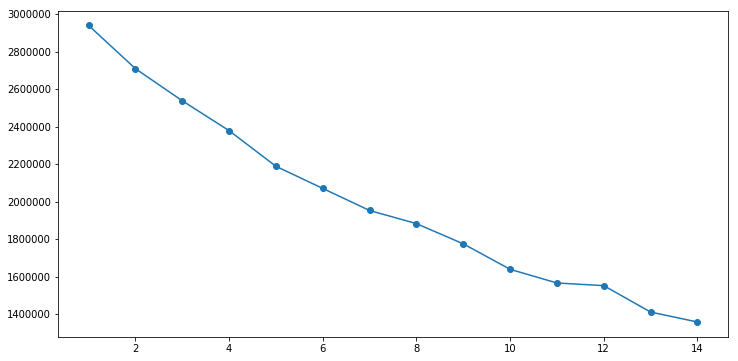

In [92]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters, cluster_df.Inertia, marker= 'o')

In [93]:
km1 = KMeans(n_clusters=4,n_init=15,random_state=3)
km1.fit(df1_scaled)
km1.inertia_

2339646.1335685435

In [94]:
label = km1.labels_
label_df = pd.DataFrame(label,columns=['Label'])
df1_scaled = df1_scaled.join(label_df)

In [95]:
df1_scaled.head()

customer_city  customer_state  customer_zip_code_prefix  freight_value  \
0      -1.516736        0.893664                 -0.551527      -0.454945   
1       0.829721        0.893664                 -0.711652      -0.781527   
2       0.864507        0.893664                 -0.847431      -0.781527   
3      -1.459586        0.893664                 -0.763462      -0.448640   
4       1.003655        0.893664                 -1.047361      -0.234912   

   order_item_id  payment_installments  payment_sequential  payment_value  \
0      -0.280778             -0.699111           -0.128705      -0.391854   
1      -0.280778             -0.699111           -0.128705      -0.411212   
2      -0.280778             -0.699111           -0.128705      -0.411212   
3      -0.280778             -0.699111           -0.128705      -0.451460   
4      -0.280778             -0.699111           -0.128705      -0.490923   

      price  product_description_lenght  product_height_cm  product_length_cm  \
0 -0.356815                   -0.697131          -1.087133          -0.880646   
1 -0.356815                   -0.697131          -1.087133          -0.880646   
2 -0.356815                   -0.697131          -1.087133          -0.880646   
3 -0.443817                   -0.114070          -0.492680          -0.818877   
4 -0.519436                    0.243788           0.101773          -0.880646   

   product_name_lenght  product_photos_qty  product_weight_g  \
0             0.526314            1.056286         -0.492033   
1             0.526314            1.056286         -0.492033   
2             0.526314            1.056286         -0.492033   
3             0.526314            1.056286         -0.518429   
4             0.526314            1.056286         -0.399648   

   product_width_cm  payment_type_credit_card  payment_type_debit_card  \
0         -1.027288                 -1.677573                -0.120785   
1         -1.027288                 -1.677573                -0.120785   
2         -1.027288                 -1.677573                -0.120785   
3         -0.857039                 -1.677573                -0.120785   
4         -1.027288                 -1.677573                -0.120785   

   payment_type_voucher  order_status_canceled  order_status_delivered  \
0             -0.237395              -0.069543                0.149353   
1             -0.237395              -0.069543                0.149353   
2             -0.237395              -0.069543                0.149353   
3             -0.237395              -0.069543                0.149353   
4             -0.237395              -0.069543                0.149353   

   order_status_invoiced  order_status_processing  order_status_shipped  \
0              -0.056256                -0.056559             -0.103398   
1              -0.056256                -0.056559             -0.103398   
2              -0.056256                -0.056559             -0.103398   
3              -0.056256                -0.056559             -0.103398   
4              -0.056256                -0.056559             -0.103398   

   order_status_unavailable  Label  
0                 -0.007715      2  
1                 -0.007715      2  
2                 -0.007715      2  
3                 -0.007715      2  
4                 -0.007715      2

In [96]:
label = km1.labels_
label_df = pd.DataFrame(label,columns=['Label'])
df2 = cpy.join(label_df)
df2.head()

customer_city                       customer_id customer_state  \
0                botucatu  f581d009238201744f193e9fce843a3b             SP   
1  santo antonio de posse  22de66d61152dcce3ff193b0734a2a7f             SP   
2   sao bernardo do campo  6cf048ee948a79b9d946243e1e05fcf1             SP   
3                cacapava  c8ed2b9476c21e4cfffa0dc1cff1d3a9             SP   
4               sao paulo  114160a5c0479d82ba49213e40a690c7             SP   

                 customer_unique_id  customer_zip_code_prefix  freight_value  \
0  b17edf8c0f122279a1160720468ebc69                     18605          12.83   
1  bc897a7580447cd7bb7416411d0b6442                     13830           7.65   
2  e5d4f3b301959c88077a062efbe3ebf9                      9781           7.65   
3  331b3b4cbbec4a67b2d5544a3ee694b6                     12285          12.93   
4  8d86e2d560f5ddbbd6354523017a492d                      3819          16.32   

    order_approved_at order_delivered_carrier_date  \
0 2018-06-01 15:52:45          2018-06-04 09:14:00   
1 2018-07-24 11:32:51          2018-07-25 16:42:00   
2 2018-08-15 03:23:59          2018-08-15 12:59:00   
3 2018-08-11 02:35:26          2018-08-13 15:43:00   
4 2018-04-06 03:28:22          2018-04-07 00:26:34   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-06-11 19:07:24                    2018-07-04   
1           2018-07-26 21:55:50                    2018-08-01   
2           2018-08-16 11:15:42                    2018-08-17   
3           2018-08-20 23:45:36                    2018-08-16   
4           2018-04-09 14:32:33                    2018-04-30   

                           order_id  order_item_id order_purchase_timestamp  \
0  162fcce5f7c895e5afb504f6f1cee4ed              1      2018-06-01 07:11:05   
1  e6e33920ebe2e3442b4c9cf86d4721aa              1      2018-07-21 16:01:11   
2  270044e25a104d6ab5daf7369e33779d              1      2018-08-14 07:23:07   
3  accddd3ce343b9c4a7ad6d49ecc3c3d2              1      2018-08-09 18:31:58   
4  eb659e24ed654c43d1e9b8b13ba04f5f              1      2018-04-05 08:02:41   

  order_status  payment_installments  payment_sequential payment_type  \
0    delivered                     1                   1       boleto   
1    delivered                     1                   1       boleto   
2    delivered                     1                   1       boleto   
3    delivered                     1                   1       boleto   
4    delivered                     1                   1       boleto   

   payment_value  price  product_category_name  product_description_lenght  \
0          67.83  55.00     relogios_presentes                       335.0   
1          62.65  55.00     relogios_presentes                       335.0   
2          62.65  55.00     relogios_presentes                       335.0   
3          51.88  38.95              telefonia                       713.0   
4          41.32  25.00  utilidades_domesticas                       945.0   

   product_height_cm                        product_id  product_length_cm  \
0                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
1                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
2                2.0  aa8d88eb4b9cb38894e33fa624c4287f               16.0   
3               10.0  abc3432ff825d8e524db1d4eac6d2099               17.0   
4               18.0  149e60a7a51b85a834c055f8025ae3e5               16.0   

   product_name_lenght  product_photos_qty  product_weight_g  \
0                 54.0                 4.0             250.0   
1                 54.0                 4.0             250.0   
2                 54.0                 4.0             250.0   
3                 54.0                 4.0             150.0   
4                 54.0                 4.0             600.0   

   product_width_cm                         seller_id shipping_limit_date  \
0              11.0  6560211a19b47992c

In [97]:
#df2.to_csv(r'C:\Users\Grace\Desktop\python\Capstone project\Capstone_E-Commerce_4Cluster.csv')

In [98]:
df1_scaled.Label.value_counts()

3    75327
2    27919
1    11793
0     2562
Name: Label, dtype: int64

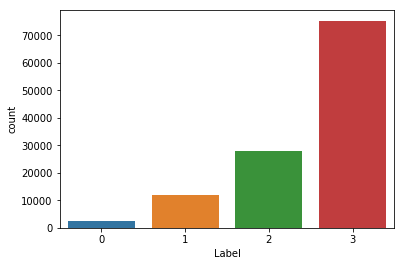

In [99]:
sns.countplot(df1_scaled['Label'])

# Further clustering the bigger one

In [100]:
fd=df1_scaled[df1_scaled["Label"]==3]
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75327 entries, 52 to 117600
Data columns (total 26 columns):
customer_city                 75327 non-null float64
customer_state                75327 non-null float64
customer_zip_code_prefix      75327 non-null float64
freight_value                 75327 non-null float64
order_item_id                 75327 non-null float64
payment_installments          75327 non-null float64
payment_sequential            75327 non-null float64
payment_value                 75327 non-null float64
price                         75327 non-null float64
product_description_lenght    75327 non-null float64
product_height_cm             75327 non-null float64
product_length_cm             75327 non-null float64
product_name_lenght           75327 non-null float64
product_photos_qty            75327 non-null float64
product_weight_g              75327 non-null float64
product_width_cm              75327 non-null float64
payment_type_credit_card      75327 non-n

In [101]:
s=fd.drop("Label", 1)

In [102]:
cluster_range=range(1,15)
cluster_errors = []  # inertia
for num_cluster in cluster_range:
    model = KMeans(num_cluster)
    model.fit(s)
    cluster_errors.append(model.inertia_)

cluster_df = pd.DataFrame({'num_clusters':cluster_range,
                           'Inertia':cluster_errors})


In [103]:
cluster_df[0:15]

num_clusters        Inertia
0              1  787936.034447
1              2  682232.331822
2              3  640131.734301
3              4  603703.926810
4              5  571033.447174
5              6  541744.330893
6              7  518483.046467
7              8  493213.149846
8              9  472470.480704
9             10  459846.180020
10            11  447596.127312
11            12  437149.317503
12            13  428077.086572
13            14  418837.500106

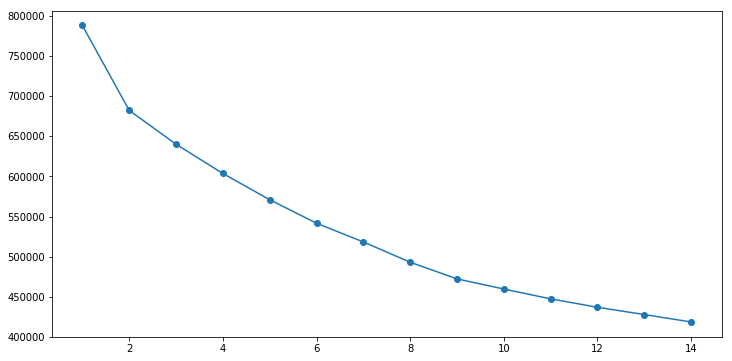

In [104]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters, cluster_df.Inertia, marker= 'o')

In [105]:
km2 = KMeans(n_clusters=2,n_init=15,random_state=3)
km2.fit(s)
km2.inertia_

682232.3350969735

In [106]:
label = km2.labels_
label_df = pd.DataFrame(label,columns=['Label'])
d7 = s.join(label_df)


In [107]:
d7.Label.value_counts()

0.0    29217
1.0    23595
Name: Label, dtype: int64

### Train & Test Split 

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x = df1_scaled.drop('Label',1)
y = df1_scaled.Label

In [110]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [111]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(82320, 25)
(35281, 25)
(82320,)
(35281,)


### BASE MODEL - Before Sampling

In [112]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

In [113]:
gnb = GaussianNB()
gnb.fit(Xtrain,ytrain)
ypred_gnb = gnb.predict(Xtest)
print('Gaussian NB Model')
print('Train Accuracy :',gnb.score(Xtrain,ytrain))
print('Test Accuracy :',gnb.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,ypred_gnb))
print('-'*50)
print('Classification Report - Naive Bayes')
print('-'*50)
print(metrics.classification_report(ytest,ypred_gnb))
print()

dtc = DecisionTreeClassifier(criterion='entropy', max_depth= 3,random_state=1)
dtc.fit(Xtrain,ytrain)
ypred_dtc = dtc.predict(Xtest)
print('Decision Tree Model')
print('Train Accuracy :',dtc.score(Xtrain,ytrain))
print('Test Accuracy :',dtc.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,ypred_dtc))
print('-'*50)
print('Classification Report - Decision Tree')
print('-'*50)
print(metrics.classification_report(ytest,ypred_dtc))
print()

rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)
ypred_rf = rf.predict(Xtest)
print('Random Forest Model')
print('Train Accuracy :',rf.score(Xtrain,ytrain))
print('Test Accuracy :',rf.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,ypred_rf))
print('-'*50)
print('Classification Report - Random Forest')
print('-'*50)
print(metrics.classification_report(ytest,ypred_rf))
print()

Gaussian NB Model
Train Accuracy : 0.9358479105928086
Test Accuracy : 0.9369348941356538
Actual and Predicted : 0.9369348941356538
--------------------------------------------------
Classification Report - Naive Bayes
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       0.92      0.41      0.56      3539
           2       0.96      1.00      0.98      8388
           3       0.93      1.00      0.96     22570

   micro avg       0.94      0.94      0.94     35281
   macro avg       0.95      0.85      0.88     35281
weighted avg       0.94      0.94      0.93     35281


Decision Tree Model
Train Accuracy : 0.9512147716229349
Test Accuracy : 0.9517020492616423
Actual and Predicted : 0.9517020492616423
--------------------------------------------------
Classification Report - Decision Tree
--------------------------------------------------
              precisio

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Model
Train Accuracy : 0.9996477162293489
Test Accuracy : 0.9902780533431592
Actual and Predicted : 0.9902780533431592
--------------------------------------------------
Classification Report - Random Forest
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       0.95      0.95      0.95      3539
           2       1.00      1.00      1.00      8388
           3       0.99      0.99      0.99     22570

   micro avg       0.99      0.99      0.99     35281
   macro avg       0.99      0.99      0.99     35281
weighted avg       0.99      0.99      0.99     35281




#### Support Vector Machine

In [114]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf_b = SVC(kernel='linear') 
clf_b.fit(Xtrain,ytrain)
pred_svm_b=clf_b.predict(Xtest)

In [115]:
print('Support Vector Machine')
print('Train Accuracy :',clf_b.score(Xtrain,ytrain))
print('Test Accuracy :',clf_b.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,pred_svm_b))
print('-'*50)
print('Classification Report SVM')
print('-'*50)
print(metrics.classification_report(ytest,pred_svm_b))
print()

Support Vector Machine
Train Accuracy : 0.9996598639455783
Test Accuracy : 0.9995464981151327
Actual and Predicted : 0.9995464981151327
--------------------------------------------------
Classification Report SVM
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       1.00      1.00      1.00      3539
           2       1.00      1.00      1.00      8388
           3       1.00      1.00      1.00     22570

   micro avg       1.00      1.00      1.00     35281
   macro avg       1.00      1.00      1.00     35281
weighted avg       1.00      1.00      1.00     35281




### Confusion Matrix - for Base Model - Before Sampling

#### Confusion Matrix - Naive Bayes

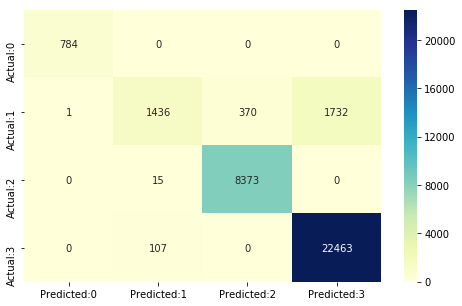

In [116]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred_gnb)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#plt.savefig("CM_4_NB_BS.png")

In [117]:
cm

array([[  784,     0,     0,     0],
       [    1,  1436,   370,  1732],
       [    0,    15,  8373,     0],
       [    0,   107,     0, 22463]], dtype=int64)

In [118]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('The accuracy of the Naive Bayes model = TP+TN / (TP+TN+FP+FN) = ',ACC,'\n\n',

'The Miss-classification = 1-Accuracy = ',1-ACC,'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TPR,'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TNR,'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',PPV,'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',NPV,'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',TPR/(1-TNR),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-TPR)/TNR)

The accuracy of the Naive Bayes model = TP+TN / (TP+TN+FP+FN) =  [0.99997166 0.93693489 0.98908761 0.94787563] 

 The Miss-classification = 1-Accuracy =  [2.83438678e-05 6.30651059e-02 1.09123891e-02 5.21243729e-02] 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  [1.         0.40576434 0.99821173 0.99525919] 

 Specificity or True Negative Rate = TN / (TN+FP) =  [0.99997101 0.99615651 0.98624177 0.86374007] 

 Positive Predictive value = TP / (TP+FP) =  [0.99872611 0.92169448 0.95768043 0.92841496] 

 Negative predictive Value = TN / (TN+FN) =  [1.         0.937639   0.99943477 0.99034819] 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  [3.44970000e+04 1.05571899e+02 7.25538056e+01 7.30412218e+00] 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  [0.         0.59652841 0.00181322 0.0054887 ]


#### Confusion Matrix - Decision Tree

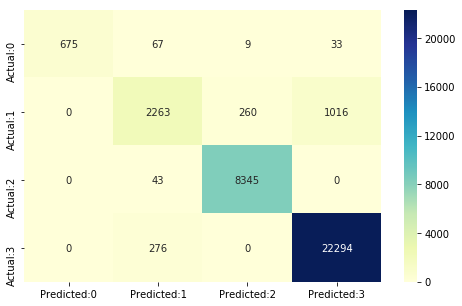

In [119]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(ytest,ypred_dtc)
conf_matrix=pd.DataFrame(data=cm_dt,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#plt.savefig("CM_4_DT_BS.png")

In [120]:
print(cm_dt)

[[  675    67     9    33]
 [    0  2263   260  1016]
 [    0    43  8345     0]
 [    0   276     0 22294]]


In [121]:
FP = cm_dt.sum(axis=0) - np.diag(cm_dt)  
FN = cm_dt.sum(axis=1) - np.diag(cm_dt)
TP = np.diag(cm_dt)
TN = cm_dt.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('The accuracy of Decision Tree the model = TP+TN / (TP+TN+FP+FN) = ',ACC,'\n\n',

'The Miss-classification = 1-Accuracy = ',1-ACC,'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TPR,'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TNR,'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',PPV,'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',NPV,'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',TPR/(1-TNR),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-TPR)/TNR)

The accuracy of Decision Tree the model = TP+TN / (TP+TN+FP+FN) =  [0.99691052 0.95289249 0.99115671 0.96244438] 

 The Miss-classification = 1-Accuracy =  [0.00308948 0.04710751 0.00884329 0.03755562] 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  [0.86096939 0.63944617 0.99487363 0.98777138] 

 Specificity or True Negative Rate = TN / (TN+FP) =  [1.         0.98783946 0.9899974  0.91747305] 

 Positive Predictive value = TP / (TP+FP) =  [1.         0.85428464 0.96877177 0.95506147] 

 Negative predictive Value = TN / (TN+FN) =  [0.99685026 0.96089728 0.99838752 0.97688055] 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  [        inf 52.58367971 99.46147399 11.9690772 ] 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  [0.13903061 0.36499233 0.00517817 0.01332859]


C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


#### Confusion Matrix - Random forest

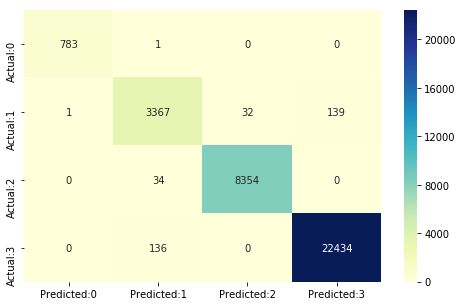

In [122]:
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(ytest,ypred_rf)
conf_matrix=pd.DataFrame(data=cm_rf,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#plt.savefig("CM_4_RF_BS.png")

In [123]:
print(cm_rf)

[[  783     1     0     0]
 [    1  3367    32   139]
 [    0    34  8354     0]
 [    0   136     0 22434]]


In [124]:
FP = cm_rf.sum(axis=0) - np.diag(cm_rf)  
FN = cm_rf.sum(axis=1) - np.diag(cm_rf)
TP = np.diag(cm_rf)
TN = cm_rf.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('The accuracy of the Random Forest model = TP+TN / (TP+TN+FP+FN) = ',ACC,'\n\n',

'The Miss-classification = 1-Accuracy = ',1-ACC,'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TPR,'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TNR,'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',PPV,'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',NPV,'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',TPR/(1-TNR),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-TPR)/TNR)

The accuracy of the Random Forest model = TP+TN / (TP+TN+FP+FN) =  [0.99994331 0.99027805 0.9981293  0.99220544] 

 The Miss-classification = 1-Accuracy =  [5.66877356e-05 9.72194666e-03 1.87069528e-03 7.79456365e-03] 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  [0.99872449 0.9513987  0.99594659 0.9939743 ] 

 Specificity or True Negative Rate = TN / (TN+FP) =  [0.99997101 0.99461282 0.9988101  0.98906459] 

 Positive Predictive value = TP / (TP+FP) =  [0.99872449 0.95166761 0.99618412 0.9938422 ] 

 Negative predictive Value = TN / (TN+FN) =  [0.99997101 0.99458148 0.99873582 0.98929808] 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  [34452.99872446   176.60407919   836.99973921    90.89501694] 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  [0.00127555 0.04886454 0.00405824 0.00609232]


# SMOTE

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
smt = SMOTE()

In [127]:
Xs = df1_scaled.drop('Label',1)
ys = df1_scaled.Label

In [128]:
Xsm,ysm = smt.fit_sample(Xs,ys)

In [129]:
Xsm.shape, ysm.shape

((301308, 25), (301308,))

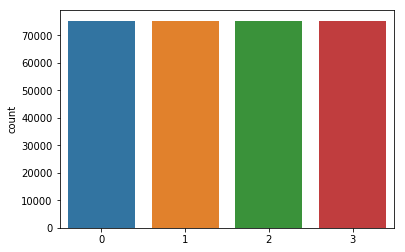

In [130]:
sns.countplot(ysm)

In [131]:
df1_scaled.Label.value_counts()

3    75327
2    27919
1    11793
0     2562
Name: Label, dtype: int64

In [132]:
Xsm = pd.DataFrame(Xsm,columns=list(Xs.columns))
Xsm.head()

customer_city  customer_state  customer_zip_code_prefix  freight_value  \
0      -1.516736        0.893664                 -0.551527      -0.454945   
1       0.829721        0.893664                 -0.711652      -0.781527   
2       0.864507        0.893664                 -0.847431      -0.781527   
3      -1.459586        0.893664                 -0.763462      -0.448640   
4       1.003655        0.893664                 -1.047361      -0.234912   

   order_item_id  payment_installments  payment_sequential  payment_value  \
0      -0.280778             -0.699111           -0.128705      -0.391854   
1      -0.280778             -0.699111           -0.128705      -0.411212   
2      -0.280778             -0.699111           -0.128705      -0.411212   
3      -0.280778             -0.699111           -0.128705      -0.451460   
4      -0.280778             -0.699111           -0.128705      -0.490923   

      price  product_description_lenght  product_height_cm  product_length_cm  \
0 -0.356815                   -0.697131          -1.087133          -0.880646   
1 -0.356815                   -0.697131          -1.087133          -0.880646   
2 -0.356815                   -0.697131          -1.087133          -0.880646   
3 -0.443817                   -0.114070          -0.492680          -0.818877   
4 -0.519436                    0.243788           0.101773          -0.880646   

   product_name_lenght  product_photos_qty  product_weight_g  \
0             0.526314            1.056286         -0.492033   
1             0.526314            1.056286         -0.492033   
2             0.526314            1.056286         -0.492033   
3             0.526314            1.056286         -0.518429   
4             0.526314            1.056286         -0.399648   

   product_width_cm  payment_type_credit_card  payment_type_debit_card  \
0         -1.027288                 -1.677573                -0.120785   
1         -1.027288                 -1.677573                -0.120785   
2         -1.027288                 -1.677573                -0.120785   
3         -0.857039                 -1.677573                -0.120785   
4         -1.027288                 -1.677573                -0.120785   

   payment_type_voucher  order_status_canceled  order_status_delivered  \
0             -0.237395              -0.069543                0.149353   
1             -0.237395              -0.069543                0.149353   
2             -0.237395              -0.069543                0.149353   
3             -0.237395              -0.069543                0.149353   
4             -0.237395              -0.069543                0.149353   

   order_status_invoiced  order_status_processing  order_status_shipped  \
0              -0.056256                -0.056559             -0.103398   
1              -0.056256                -0.056559             -0.103398   
2              -0.056256                -0.056559             -0.103398   
3              -0.056256                -0.056559             -0.103398   
4              -0.056256                -0.056559             -0.103398   

   order_status_unavailable  
0                 -0.007715  
1                 -0.007715  
2                 -0.007715  
3                 -0.007715  
4                 -0.007715

In [133]:
ysm = pd.DataFrame(ysm,columns=['Label'])
ysm.Label.value_counts()

3    75327
2    75327
1    75327
0    75327
Name: Label, dtype: int64

In [134]:
#cpy = cpy.join(label_df)

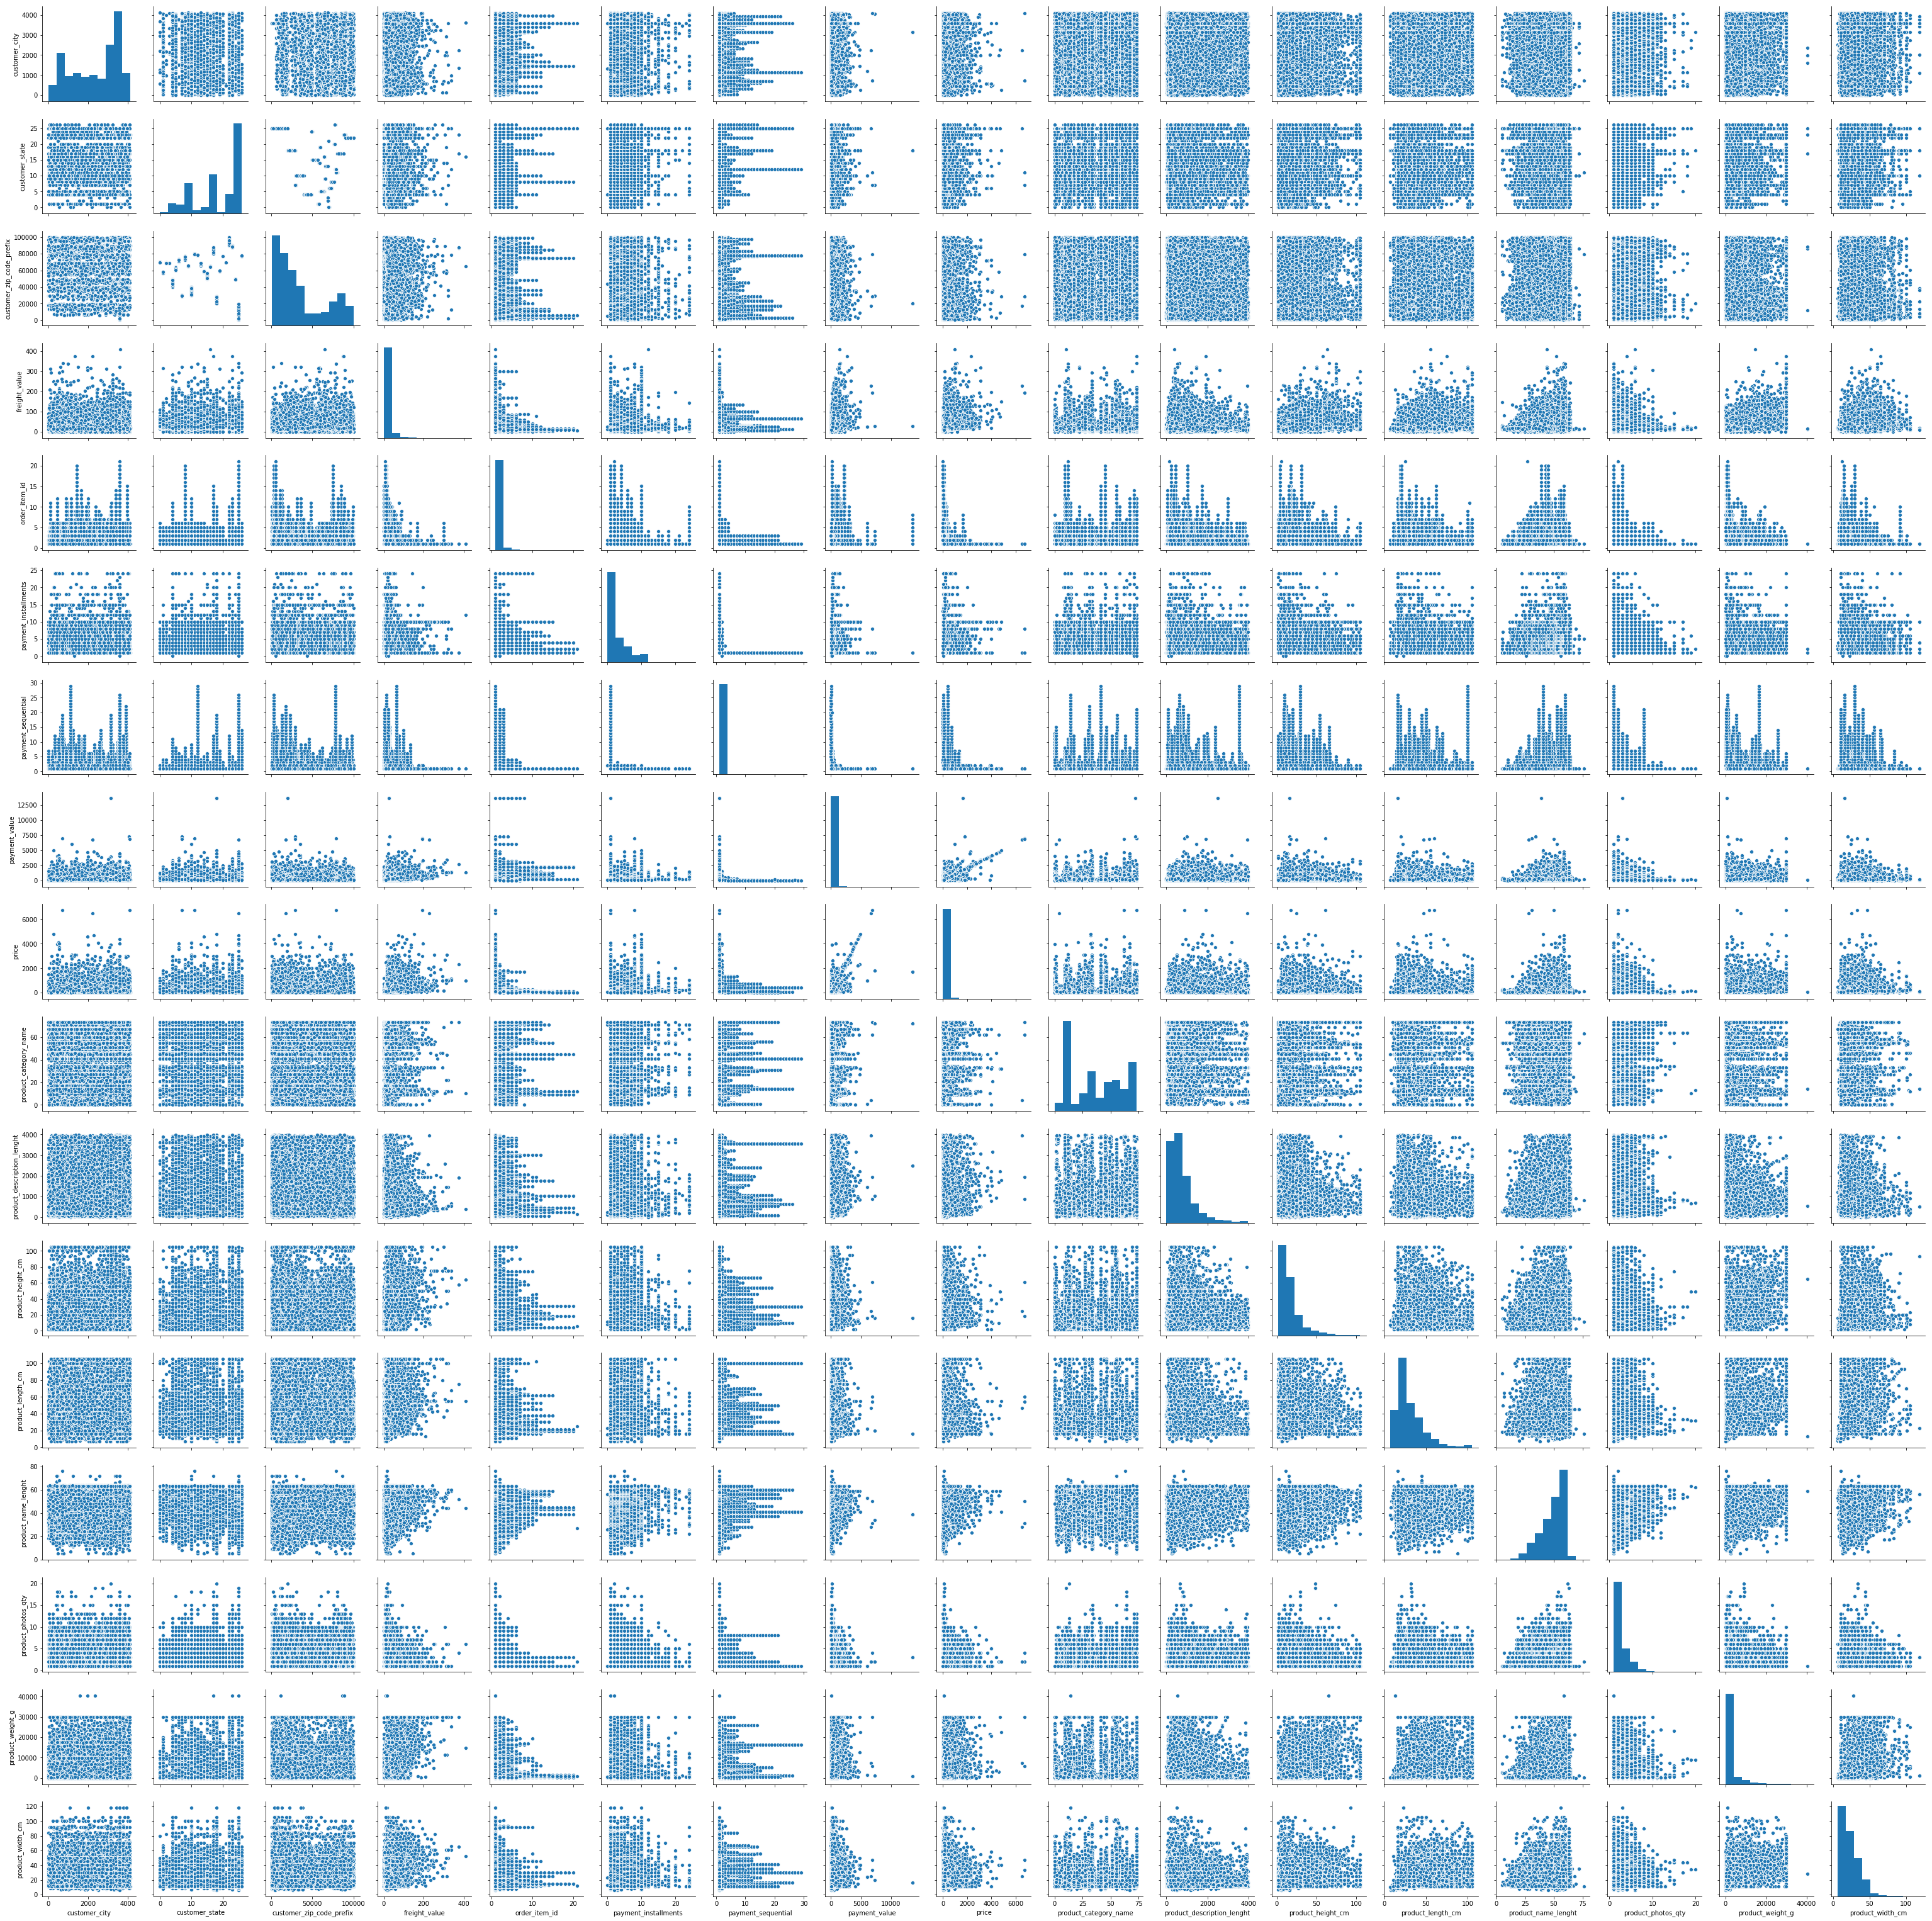

In [135]:
sns.pairplot(data=dt)
#plt.savefig("pair.png")

In [136]:
dt_L = dt.join(label_df)

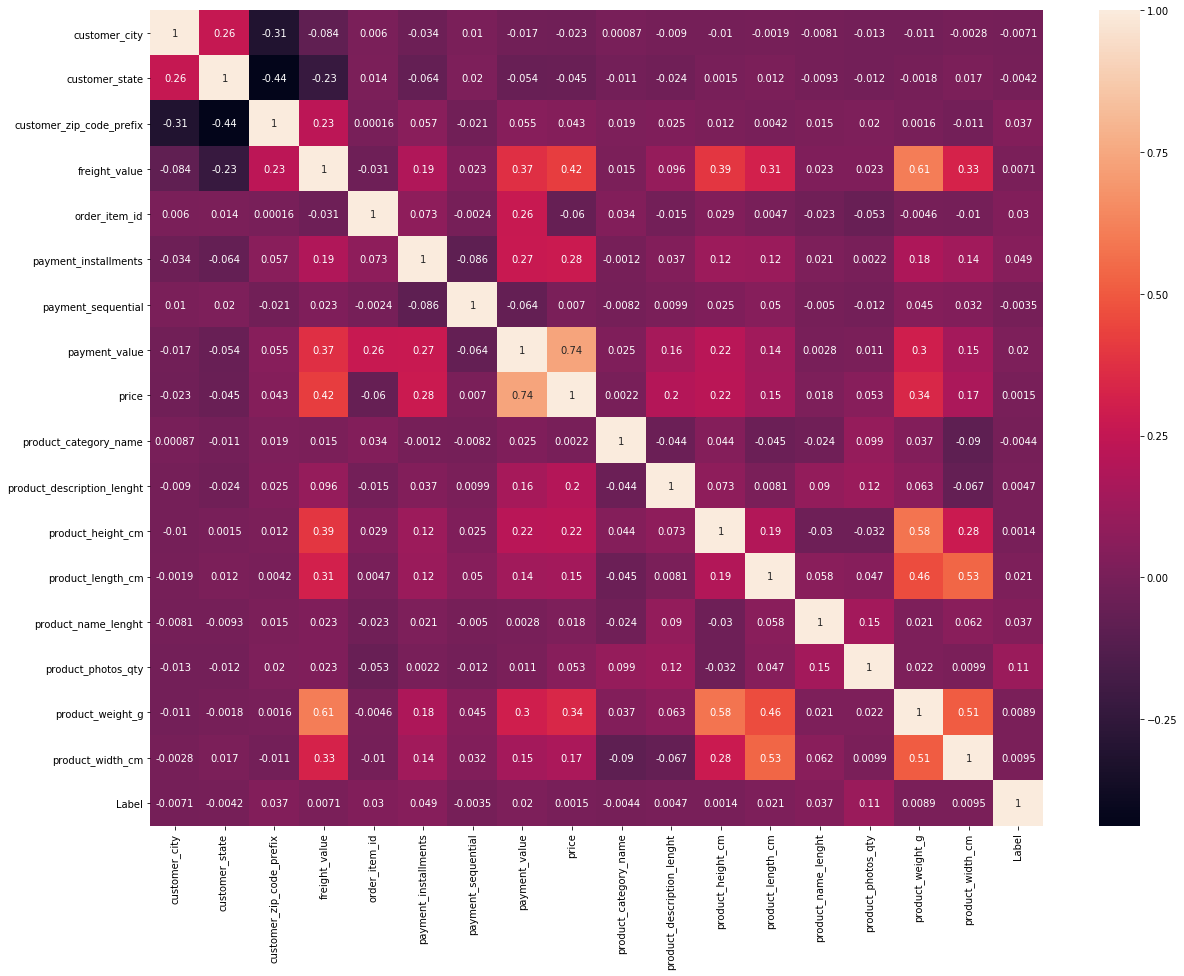

In [137]:
plt.figure(figsize=(20,15))
sns.heatmap(dt_L.corr(), annot=True)
#plt.savefig("heat.png")

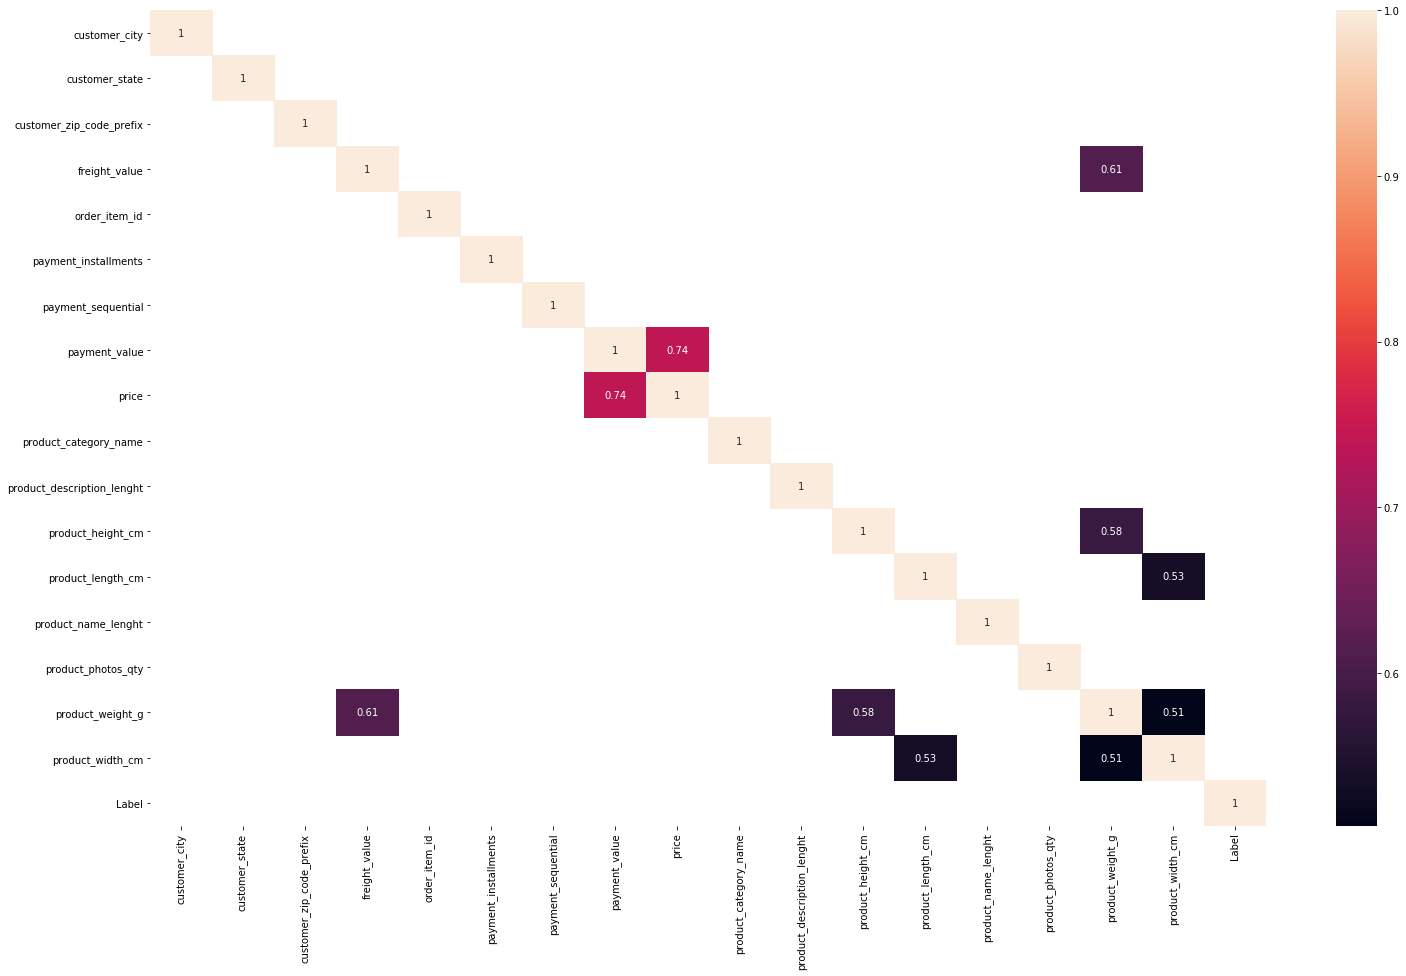

In [138]:
plt.figure(figsize=(25,15))
corr = np.abs(dt_L.corr())
corr = dt_L.corr()[corr>0.5]
sns.heatmap(corr,annot=True)
#plt.savefig("heat1.png")

In [139]:
#dt_L.corr()[np.abs(dt_L.corr()['Label']) > 0.5]

In [140]:
df2_scaled = Xsm.join(ysm)
df2_scaled.tail()

customer_city  customer_state  customer_zip_code_prefix  \
301303       0.282451        0.893664                 -0.855171   
301304       1.312750       -1.228960                  0.100697   
301305       0.838778       -0.379910                  0.980623   
301306       0.142018        0.893664                 -0.685880   
301307       0.801238       -1.450142                  1.211130   

        freight_value  order_item_id  payment_installments  \
301303      -0.381886      -0.280778             -0.699111   
301304      -0.119330      -0.280778             -0.699111   
301305       0.286601      -0.280778             -0.699111   
301306      -0.351531      -0.280778             -0.699111   
301307       0.276444       6.885599             -0.699111   

        payment_sequential  payment_value     price  \
301303           -0.128705      -0.410756 -0.390514   
301304           -0.128705      -0.209791 -0.121583   
301305           -0.128705      -0.267751 -0.240557   
301306           -0.128705      -0.106130  0.048744   
301307           -0.128705       1.513395 -0.390531   

        product_description_lenght  product_height_cm  product_length_cm  \
301303                   -0.963167          -0.740492           0.766413   
301304                   -0.328318          -0.106861          -0.730966   
301305                   -0.158998          -0.669060           0.051979   
301306                   -0.294358          -0.582545           2.381601   
301307                   -0.601950           0.934140          -0.424907   

        product_name_lenght  product_photos_qty  product_weight_g  \
301303            -1.090888           -0.694890         -0.383503   
301304            -0.979306           -0.694890         -0.482823   
301305            -0.417868            0.709892         -0.354107   
301306             0.729416           -0.694890          0.365109   
301307             0.538116           -0.439820         -0.280756   

        product_width_cm  payment_type_credit_card  payment_type_debit_card  \
301303          0.665699                 -1.677573                -0.120785   
301304         -0.614734                 -1.677573                -0.120785   
301305         -0.601665                 -1.677573                -0.120785   
301306          3.894111                 -1.677573                -0.120785   
301307          0.026399                 -1.677573                -0.120785   

        payment_type_voucher  order_status_canceled  order_status_delivered  \
301303             -0.237395              -0.069543                0.149353   
301304             -0.237395              -0.069543                0.149353   
301305             -0.237395              -0.069543                0.149353   
301306             -0.237395              -0.069543                0.149353   
301307             -0.237395              -0.069543                0.149353   

        order_status_invoiced  order_status_processing  order_status_shipped  \
301303              -0.056256                -0.056559             -0.103398   
301304              -0.056256                -0.056559             -0.103398   
301305              -0.056256                -0.056559             -0.103398   
301306              -0.056256                -0.056559             -0.103398   
301307              -0.056256                -0.056559             -0.103398   

        order_status_unavailable  Label  
301303                 -0.007715      2  
301304                 -0.007715      2  
301305                 -0.007715      2  
301306                 -0.007715      2  
301307                 -0.007715      2

#### NearMiss - UnderSampling

In [141]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()

In [142]:
Xn = df2_scaled.drop('Label',1)
yn = df2_scaled.Label

In [143]:
Xnr,ynr = nr.fit_sample(Xn,yn)

In [144]:
Xnr.shape,ynr.shape

((301308, 25), (301308,))

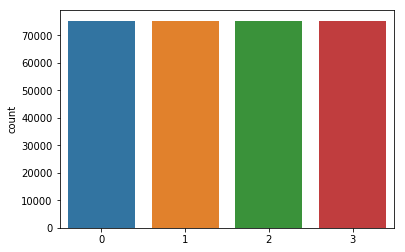

In [145]:
sns.countplot(ynr)

In [146]:
Xnr = pd.DataFrame(Xnr,columns=list(Xn.columns))
Xnr.head()

customer_city  customer_state  customer_zip_code_prefix  freight_value  \
0        0.96804        0.893664                 -0.765105      -0.674978   
1        0.96804        0.893664                 -0.765105      -0.674978   
2        0.96804        0.893664                 -0.765105      -0.674978   
3        0.96804        0.893664                 -0.765105      -0.674978   
4        0.96804        0.893664                 -0.765105      -0.674978   

   order_item_id  payment_installments  payment_sequential  payment_value  \
0      -0.280778             -0.699111           -0.128705       0.301442   
1       1.152497             -0.699111           -0.128705       0.301442   
2       2.585773             -0.699111           -0.128705       0.301442   
3       4.019048             -0.699111           -0.128705       0.301442   
4       5.452324             -0.699111           -0.128705       0.301442   

      price  product_description_lenght  product_height_cm  product_length_cm  \
0 -0.430916                    0.000075          -0.121147          -0.880646   
1 -0.430916                    0.000075          -0.121147          -0.880646   
2 -0.430916                    0.000075          -0.121147          -0.880646   
3 -0.430916                    0.000075          -0.121147          -0.880646   
4 -0.430916                    0.000075          -0.121147          -0.880646   

   product_name_lenght  product_photos_qty  product_weight_g  \
0            -0.075934            -0.69489         -0.426044   
1            -0.075934            -0.69489         -0.426044   
2            -0.075934            -0.69489         -0.426044   
3            -0.075934            -0.69489         -0.426044   
4            -0.075934            -0.69489         -0.426044   

   product_width_cm  payment_type_credit_card  payment_type_debit_card  \
0          -0.68679                 -1.677573                -0.120785   
1          -0.68679                 -1.677573                -0.120785   
2          -0.68679                 -1.677573                -0.120785   
3          -0.68679                 -1.677573                -0.120785   
4          -0.68679                 -1.677573                -0.120785   

   payment_type_voucher  order_status_canceled  order_status_delivered  \
0             -0.237395              -0.069543               -6.695556   
1             -0.237395              -0.069543               -6.695556   
2             -0.237395              -0.069543               -6.695556   
3             -0.237395              -0.069543               -6.695556   
4             -0.237395              -0.069543               -6.695556   

   order_status_invoiced  order_status_processing  order_status_shipped  \
0              17.775934                -0.056559             -0.103398   
1              17.775934                -0.056559             -0.103398   
2              17.775934                -0.056559             -0.103398   
3              17.775934                -0.056559             -0.103398   
4              17.775934                -0.056559             -0.103398   

   order_status_unavailable  
0                 -0.007715  
1                 -0.007715  
2                 -0.007715  
3                 -0.007715  
4                 -0.007715

In [147]:
ynr = pd.DataFrame(ynr,columns=['Label'])
ynr.Label.value_counts()

3    75327
2    75327
1    75327
0    75327
Name: Label, dtype: int64

### MODEL EVALUATION - After Sampling

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X = df2_scaled.drop('Label',1)
Y = df2_scaled.Label

In [150]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

In [151]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(210915, 25)
(90393, 25)
(210915,)
(90393,)


#### Naive Bayes, Decision Tree, Random Forest

In [152]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [153]:
from sklearn.metrics import accuracy_score, classification_report

In [154]:
gnb1 = GaussianNB()
gnb1.fit(Xtrain,ytrain)
ypred_gnb1 = gnb1.predict(Xtest)
print('Gaussian NB Model')
print('Train Accuracy :',gnb1.score(Xtrain,ytrain))
print('Test Accuracy :',gnb1.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,ypred_gnb1))
print('-'*50)
print('Classification Report - Naive Bayes')
print('-'*50)
print(metrics.classification_report(ytest,ypred_gnb1))
print()

dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth= 5,random_state=1)
dtc1.fit(Xtrain,ytrain)
ypred_dtc1 = dtc1.predict(Xtest)
print('Decision Tree Model')
print('Train Accuracy :',dtc1.score(Xtrain,ytrain))
print('Test Accuracy :',dtc1.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,ypred_dtc1))
print('-'*50)
print('Classification Report - Decision Tree')
print('-'*50)
print(metrics.classification_report(ytest,ypred_dtc1))
print()

rf1 = RandomForestClassifier()
rf1.fit(Xtrain,ytrain)
ypred_rf1 = rf1.predict(Xtest)
print('Random Forest Model')
print('Train Accuracy :',rf1.score(Xtrain,ytrain))
print('Test Accuracy :',rf1.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,ypred_rf1))
print('-'*50)
print('Classification Report - Random Forest')
print('-'*50)
print(metrics.classification_report(ytest,ypred_rf1))
print()

Gaussian NB Model
Train Accuracy : 0.8607780385463338
Test Accuracy : 0.860498047415176
Actual and Predicted : 0.860498047415176
--------------------------------------------------
Classification Report - Naive Bayes
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22484
           1       0.98      0.45      0.62     22604
           2       0.92      1.00      0.96     22633
           3       0.68      0.99      0.81     22672

   micro avg       0.86      0.86      0.86     90393
   macro avg       0.90      0.86      0.85     90393
weighted avg       0.90      0.86      0.85     90393


Decision Tree Model
Train Accuracy : 0.9617571059431524
Test Accuracy : 0.9623532795681081
Actual and Predicted : 0.9623532795681081
--------------------------------------------------
Classification Report - Decision Tree
--------------------------------------------------
              precision 

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Model
Train Accuracy : 0.9997060427186307
Test Accuracy : 0.9954753133539102
Actual and Predicted : 0.9954753133539102
--------------------------------------------------
Classification Report - Random Forest
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22484
           1       0.98      1.00      0.99     22604
           2       1.00      1.00      1.00     22633
           3       1.00      0.99      0.99     22672

   micro avg       1.00      1.00      1.00     90393
   macro avg       1.00      1.00      1.00     90393
weighted avg       1.00      1.00      1.00     90393




#### Support Vector Machine

In [155]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
clf.fit(Xtrain,ytrain)
pred_svm=clf.predict(Xtest)

In [156]:
print('Support Vector Machine')
print('Train Accuracy :',clf.score(Xtrain,ytrain))
print('Test Accuracy :',clf.score(Xtest,ytest))
print('Actual and Predicted :',metrics.accuracy_score(ytest,pred_svm))
print('-'*50)
print('Classification Report SVM')
print('-'*50)
print(classification_report(ytest,pred_svm))
print()

Support Vector Machine
Train Accuracy : 0.9995732878173672
Test Accuracy : 0.9994468598232163
Actual and Predicted : 0.9994468598232163
--------------------------------------------------
Classification Report SVM
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22484
           1       1.00      1.00      1.00     22604
           2       1.00      1.00      1.00     22633
           3       1.00      1.00      1.00     22672

   micro avg       1.00      1.00      1.00     90393
   macro avg       1.00      1.00      1.00     90393
weighted avg       1.00      1.00      1.00     90393




### Bagging Method

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()


In [159]:
base_models = [dtc,rf,gnb]
for bm in base_models:
    print('Method:',bm)
    bag = BaggingClassifier(base_estimator=bm,bootstrap=True)
    bag.fit(Xtrain,ytrain)
    ypred_bag = bag.predict(Xtest)
    print('Train Accuracy :',bag.score(Xtrain,ytrain))
    print('Test Accuracy :',bag.score(Xtest,ytest))
    print('Actual and Predicted',metrics.accuracy_score(ytest,ypred_bag))
    print('-'*50)
    print('Classification Report')
    print('-'*50)
    print(classification_report(ytest,ypred_bag))
    print()

Method: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
Train Accuracy : 0.9392361851930873
Test Accuracy : 0.9391324549467326
Actual and Predicted 0.9391324549467326
--------------------------------------------------
Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22484
           1       0.86      0.90      0.88     22604
           2       0.98      0.95      0.97     22633
           3       0.92      0.90      0.91     22672

   micro avg       0.94      0.94      0.94     90393
   macro avg       0.94      0.94      0.94     90393
weighted avg       0.94      0

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Train Accuracy : 0.9995685465708934
Test Accuracy : 0.9963603376367639
Actual and Predicted 0.9963603376367639
--------------------------------------------------
Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22484
           1       0.99      1.00      0.99     22604
           2       1.00      1.00      1.00     22633
           3       1.00      0.99      0.99     22672

   micro avg       1.00      1.00      1.00     90393
   macro avg       1.00      1.00      1.00     90393
weighted avg       1.00      1.00      1.00     90393


Method: GaussianNB(priors=None, var_smoothing=1e-09)
Train Accuracy : 0.8596733281179623
Test Accuracy : 0.8595355835075725
Actual and Predicted 0.8595355835075725
--------------------------------------------------
Classification Report
--------------------------------------------------
              precision    recall  f1-sco

In [160]:
# df2.Label.value_counts()

# CUSTOMER ANALYSIS

In [161]:
customer_country=dt[['customer_state','customer_id']].drop_duplicates()
customer_country.groupby(['customer_state'])['customer_id'].aggregate('count').reset_index().sort_values('customer_id', ascending=False)

customer_state  customer_id
25              25        41374
18              18        12762
10              10        11544
22              22         5432
17              17         4998
23              23         3612
4                4         3358
6                6         2125
7                7         2025
8                8         2007
15              15         1648
5                5         1327
13              13          970
12              12          903
9                9          740
11              11          709
14              14          532
16              16          493
19              19          482
1                1          411
24              24          345
26              26          279
20              20          247
2                2          147
0                0           81
3                3           68
21              21           46

In [162]:
from datetime import date
NOW= date.today()

rfmTable = dt.groupby('customer_unique_id').agg({ 'order_id': lambda x: len(x), 'price': lambda x: x.sum()}).sort_values('price', ascending=False)
#rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_id': 'frequency', 
                        'price': 'monetary_value'}, inplace=True)

In [163]:
rfmTable.head(10)

frequency  monetary_value
customer_unique_id                                         
0a0a92112bd4c708ca5fde585afaa872          8        13440.00
8af7ac63b2efbcbd88e5b11505e8098a         29        11383.95
c4b224d2c784bae11ae98b6ae9f2454c         15        10856.10
85963fd37bfd387aa6d915d8a1065486         24         9888.00
be74c431147c32ab2d7c7cef5e4a995f          7         9520.14
edf81e1f3070b9dac83ec83dacdbb9bc          2         7998.00
1033eef37a760a832f9b2332ce23fdc5          6         7799.40
58483a1c055dfb600f57c5b867174542          2         7798.00
da122df9eeddfedc1dc1f5349a1a690c          2         7388.00
763c8b1c9c68a0229c42c9fc6f662b93          4         7160.00

In [164]:
from datetime import date
NOW= date.today()

rfmTable1 = dt.groupby('customer_unique_id').agg({ 'order_id': lambda x: len(x), 'price': lambda x: x.sum()}).sort_values('order_id', ascending=False)
#rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable1.rename(columns={'order_id': 'frequency', 
                        'price': 'monetary_value'}, inplace=True)

In [165]:
rfmTable1.head(10)

frequency  monetary_value
customer_unique_id                                         
9a736b248f67d166d2fbb006bcb877c3         75         2847.78
6fbc7cdadbb522125f4b27ae9dee4060         38         3039.62
f9ae226291893fda10af7965268fb7f6         35         5436.50
8af7ac63b2efbcbd88e5b11505e8098a         29        11383.95
569aa12b73b5f7edeaa6f2a01603e381         26         1299.74
5419a7c9b86a43d8140e2939cd2c2f7e         24          359.76
c8460e4251689ba205045f3ea17884a1         24         4080.00
db1af3fd6b23ac3873ef02619d548f9c         24         2914.68
85963fd37bfd387aa6d915d8a1065486         24         9888.00
2524dcec233c3766f2c2b22f69fd65f4         22          638.00

### Confusion matrix - After Sampling 

#### Confusion matrix - Naive Bayes

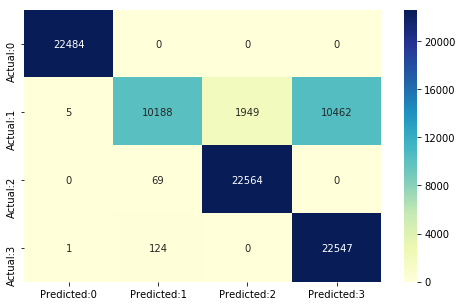

In [166]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(ytest,ypred_gnb1)
conf_matrix=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#plt.savefig("CM_4.png")

In [167]:
print(cm1)

[[22484     0     0     0]
 [    5 10188  1949 10462]
 [    0    69 22564     0]
 [    1   124     0 22547]]


In [168]:
FP = cm1.sum(axis=0) - np.diag(cm1)  
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('The acuuracy of the Naive Bayes model = TP+TN / (TP+TN+FP+FN) = ',ACC,'\n\n',

'The Miss-classification = 1-Accuracy = ',1-ACC,'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TPR,'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TNR,'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',PPV,'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',NPV,'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',TPR/(1-TNR),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-TPR)/TNR)

The acuuracy of the Naive Bayes model = TP+TN / (TP+TN+FP+FN) =  [0.99993362 0.86050911 0.97767526 0.8828781 ] 

 The Miss-classification = 1-Accuracy =  [6.63768212e-05 1.39490890e-01 2.23247375e-02 1.17121901e-01] 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  [1.         0.45071669 0.99695135 0.99448659] 

 Specificity or True Negative Rate = TN / (TN+FP) =  [0.99991165 0.99715293 0.97123672 0.84551321] 

 Positive Predictive value = TP / (TP+FP) =  [0.99973321 0.98140834 0.92049117 0.68305614] 

 Negative predictive Value = TN / (TN+FN) =  [1.         0.84482328 0.99895264 0.99782169] 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  [1.13181667e+04 1.58308982e+02 3.46605561e+01 6.43735676e+00] 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  [0.         0.55085163 0.00313893 0.00652078]


#### Confusion Matrix - Decision Tree

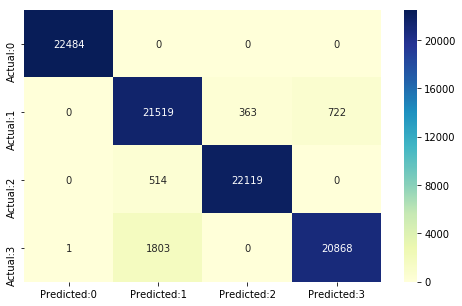

In [169]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(ytest,ypred_dtc1)
conf_matrix=pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#plt.savefig("CM_4_DTC.png")

In [170]:
print(cm2)

[[22484     0     0     0]
 [    0 21519   363   722]
 [    0   514 22119     0]
 [    1  1803     0 20868]]


In [171]:
FP = cm2.sum(axis=0) - np.diag(cm2)  
FN = cm2.sum(axis=1) - np.diag(cm2)
TP = np.diag(cm2)
TN = cm2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('The acuuracy of the Decision Tree model = TP+TN / (TP+TN+FP+FN) = ',ACC,'\n\n',

'The Miss-classification = 1-Accuracy = ',1-ACC,'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TPR,'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TNR,'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',PPV,'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',NPV,'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',TPR/(1-TNR),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-TPR)/TNR)

The acuuracy of the Decision Tree model = TP+TN / (TP+TN+FP+FN) =  [0.99998894 0.96236434 0.99029792 0.97205536] 

 The Miss-classification = 1-Accuracy =  [1.10628035e-05 3.76356576e-02 9.70207870e-03 2.79446417e-02] 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  [1.         0.95199965 0.9772898  0.92043049] 

 Specificity or True Negative Rate = TN / (TN+FP) =  [0.99998527 0.96582041 0.99464286 0.98933861] 

 Positive Predictive value = TP / (TP+FP) =  [0.99995553 0.90279409 0.98385375 0.96655859] 

 Negative predictive Value = TN / (TN+FN) =  [1.         0.98369818 0.99243127 0.97378021] 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  [6.79090000e+04 2.78528718e+01 1.82427429e+02 8.63330651e+01] 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  [0.         0.04969905 0.02283252 0.08042698]


#### Confusion Matrix - Random Forest

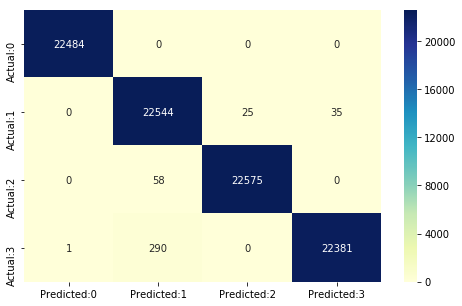

In [172]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(ytest,ypred_rf1)
conf_matrix=pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#plt.savefig("CM_4_RF.png")

In [173]:
print(cm3)

[[22484     0     0     0]
 [    0 22544    25    35]
 [    0    58 22575     0]
 [    1   290     0 22381]]


In [174]:
FP = cm3.sum(axis=0) - np.diag(cm3)  
FN = cm3.sum(axis=1) - np.diag(cm3)
TP = np.diag(cm3)
TN = cm3.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('The acuuracy of the Random forest model = TP+TN / (TP+TN+FP+FN) = ',ACC,'\n\n',

'The Miss-classification = 1-Accuracy = ',1-ACC,'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TPR,'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TNR,'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',PPV,'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',NPV,'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',TPR/(1-TNR),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-TPR)/TNR)

The acuuracy of the Random forest model = TP+TN / (TP+TN+FP+FN) =  [0.99998894 0.99548638 0.99908179 0.99639353] 

 The Miss-classification = 1-Accuracy =  [1.10628035e-05 4.51362384e-03 9.18212693e-04 3.60647395e-03] 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  [1.         0.9973456  0.99743737 0.98716478] 

 Specificity or True Negative Rate = TN / (TN+FP) =  [0.99998527 0.99486642 0.99963105 0.99948317] 

 Positive Predictive value = TP / (TP+FP) =  [0.99995553 0.98479818 0.99889381 0.99843862] 

 Negative predictive Value = TN / (TN+FN) =  [1.         0.99911112 0.99914445 0.99571914] 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  [67908.9999998    194.27891107  2703.45424822  1910.05103967] 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  [0.         0.00266809 0.00256358 0.01284185]


#### Confusion Matrix - SVM

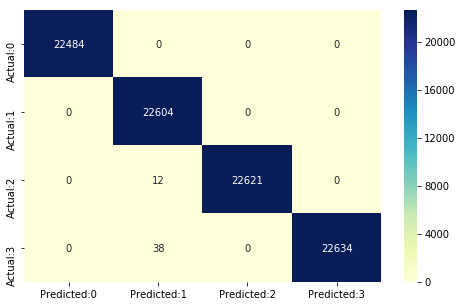

In [175]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(ytest,pred_svm)
conf_matrix=pd.DataFrame(data=cm4,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3']
                         ,index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#plt.savefig("CM_4_SVM.png")

In [176]:
print(cm4)

[[22484     0     0     0]
 [    0 22604     0     0]
 [    0    12 22621     0]
 [    0    38     0 22634]]


In [177]:
FP = cm4.sum(axis=0) - np.diag(cm4)  
FN = cm4.sum(axis=1) - np.diag(cm4)
TP = np.diag(cm4)
TN = cm4.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


print('The acuuracy of the SVM model = TP+TN / (TP+TN+FP+FN) = ',ACC,'\n\n',

'The Miss-classification = 1-Accuracy = ',1-ACC,'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TPR,'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TNR,'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',PPV,'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',NPV,'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',TPR/(1-TNR),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-TPR)/TNR)

The acuuracy of the SVM model = TP+TN / (TP+TN+FP+FN) =  [1.         0.99944686 0.99986725 0.99957961] 

 The Miss-classification = 1-Accuracy =  [0.         0.00055314 0.00013275 0.00042039] 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  [1.         1.         0.9994698  0.99832392] 

 Specificity or True Negative Rate = TN / (TN+FP) =  [1.         0.99926242 1.         1.        ] 

 Positive Predictive value = TP / (TP+FP) =  [1.         0.99779288 1.         1.        ] 

 Negative predictive Value = TN / (TN+FN) =  [1.         1.         0.99982294 0.99943919] 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  [    inf 1355.78     inf     inf] 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  [0.         0.         0.0005302  0.00167608]


C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


In [178]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [179]:
gnb.fit(Xtrain,ytrain)
y_pred_prob=gnb.predict_proba(Xtest)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Cluster_0','Cluster_1','Cluster_2','Cluster_3'])
y_pred_prob_df.head()

Cluster_0     Cluster_1  Cluster_2     Cluster_3
0        0.0  3.818904e-30        1.0  0.000000e+00
1        0.0  1.023791e-10        0.0  1.000000e+00
2        0.0  4.193224e-19        1.0  0.000000e+00
3        0.0  1.162146e-19        1.0  0.000000e+00
4        0.0  1.000000e+00        0.0  9.047413e-65

In [180]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
